In [4]:
!pip install matplotlib
!pip install scikit-learn
!pip install numpy pandas matplotlib scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install pulp

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pulp

In [7]:
import sys
print(sys.executable)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\python.exe


In [8]:
import sys
!"{sys.executable}" -m pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import sklearn
print("sklearn artık çalışıyor!")

sklearn artık çalışıyor!


In [10]:
# 1. GEREKLİ KÜTÜPHANELER

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
# 2. DOSYA OKUMA

df = pd.read_csv("C:/Users/Lenovo/Desktop/Yeni klasör/firmalar.csv", encoding="latin1")

# Latitude – Longitude kolon isimleri
lat_col = "LATITUDE"
lon_col = "LONGITUDE"

# Eksik koordinatları temizle
df = df.dropna(subset=[lat_col, lon_col]).copy()

coords = df[[lat_col, lon_col]].to_numpy()

print("Toplam firma sayısı:", len(coords))


Toplam firma sayısı: 263


In [12]:
df = df.dropna(subset=[lat_col, lon_col]).copy()

In [13]:
df = pd.read_csv(r"C:/Users/Lenovo/Desktop/Yeni klasör/firmalar.csv", encoding="latin1")
df


,FIRM'S NAME,LATITUDE,LONGITUDE,AMOUNT OF WASTE,REGION,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,ASLANSOY TEKST?L SAN. VE T?C. A.?.,37.147905,37.288444,42.0,1.0,NaN,NaN,NaN
1,B?LG?NLER TEKST?L ÖRME SAN. VE T?C. LTD. ?T?.,37.151920,37.291090,115.0,1.0,NaN,NaN,NaN
2,DOKUTEKS HALI TEKST?L SANAY? VE T?CARET A.?.,37.946873,37.385399,91.0,1.0,NaN,NaN,NaN
3,ERKENT TEKST?L SANAY? VE T?C.A.?.,37.087792,37.441044,14.0,1.0,NaN,NaN,NaN
4,GÜLSAN SENTET?K DOKUMA SAN. VE T?C. A.?.,37.150966,37.292398,73.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.columns

Index(['FIRM'S NAME', 'LATITUDE', 'LONGITUDE', 'AMOUNT OF WASTE', 'REGION',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [15]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FIRM'S NAME      263 non-null    object 
 1   LATITUDE         263 non-null    float64
 2   LONGITUDE        263 non-null    float64
 3   AMOUNT OF WASTE  263 non-null    float64
 4   REGION           262 non-null    float64
 5   Unnamed: 5       0 non-null      float64
 6   Unnamed: 6       0 non-null      float64
 7   Unnamed: 7       0 non-null      float64
dtypes: float64(7), object(1)
memory usage: 18.9+ KB


In [16]:
df[["LATITUDE", "LONGITUDE"]].isna().sum()


LATITUDE     38
LONGITUDE    38
dtype: int64

In [17]:
df = df.dropna(subset=["LATITUDE", "LONGITUDE"])


In [18]:
df[["LATITUDE", "LONGITUDE"]].isna().sum()


LATITUDE     0
LONGITUDE    0
dtype: int64

In [19]:

coords = np.array(
    df[["LATITUDE", "LONGITUDE"]].values,
    dtype=float
)


In [20]:
print("NaN sayısı:", np.isnan(coords).sum())
print("+inf sayısı:", np.isinf(coords).sum())


NaN sayısı: 0
+inf sayısı: 0


In [21]:
print(coords.shape)
print(coords[:5])


(263, 2)
[[37.14790531 37.28844418]
 [37.1519196  37.29109041]
 [37.94687299 37.38539911]
 [37.08779208 37.44104434]
 [37.15096558 37.29239802]]


# K-Means

In [22]:
from sklearn.cluster import KMeans

K_list = range(1, 8)
inertias = []

for k in K_list:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(coords)
    inertias.append(kmeans.inertia_)

print("KMeans başarılı ✅")


KMeans başarılı ✅


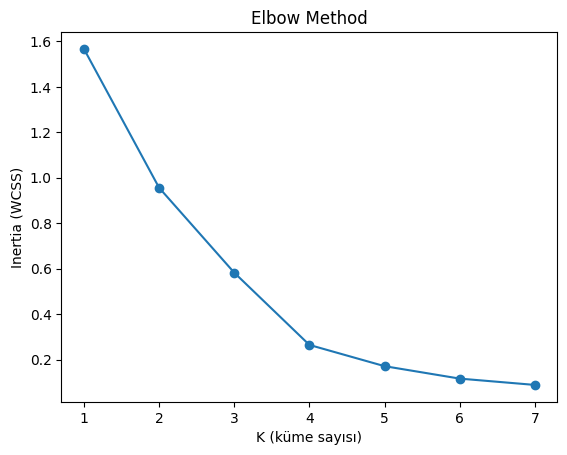

In [23]:
import matplotlib.pyplot as plt

plt.plot(K_list, inertias, marker='o')
plt.xlabel("K (küme sayısı)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method")
plt.show()


kmeans.inertia_, K-Means’in her k için hesapladığı toplam küme içi kareler toplamı (WCSS) değeridir.

# Elbow Method ile k Aralığını İncele

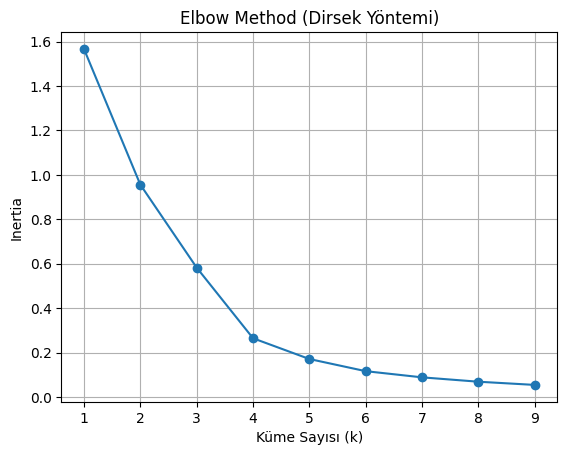

Text(2, 0.9560927040567229, 'k=2')

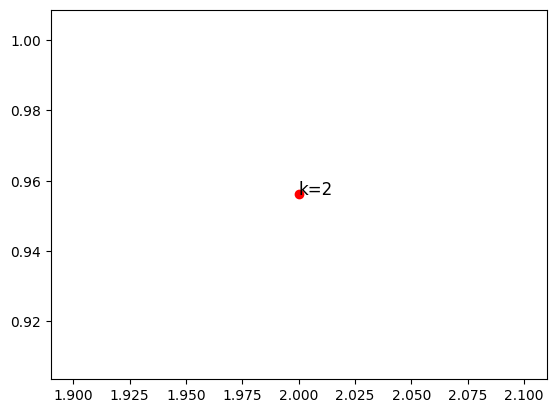

In [24]:
#Şimdi kaç tane küme deneyeceğimizi seçelim: 2’den 10’a kadar.
#Grafik çıktığında, eğrinin “birden yavaşladığı” yeri gözünle göreceksin.
#Orası bizim için “makul toplama merkezi sayısı” adayı.

inertias = []
K_list = range(1, 10)  # 2 ile 10 arasında farklı k'ler deneyeceğiz

for k in K_list:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(coords)
    inertias.append(kmeans.inertia_)

plt.plot(K_list, inertias, marker='o')
plt.title("Elbow Method (Dirsek Yöntemi)")
plt.xlabel("Küme Sayısı (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


plt.scatter(2, inertias[1], color='red')
plt.text(2, inertias[1], "k=2", fontsize=12)

1. Elbow Method Yorumu

Grafikte en keskin düşüş k=2 → k=3 arasında oluyor.
k=2'den sonra eğri daha yumuşak bir şekilde azalmaya başlıyor.

Bu ne demek?

➡ K=2 kısmında “dirsek” oluşuyor → doğru küme sayısı 2.

# Silhouette Score ile En İyi k’yi Otomatik Seç

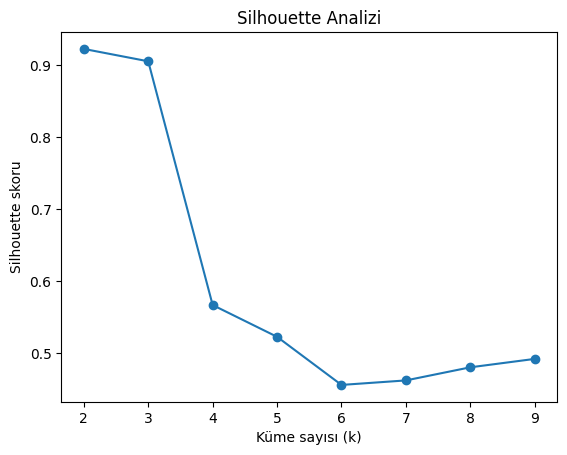

Seçilen k (Toplama merkezi sayısı): 2


In [25]:
#Şimdi de aynı
#k değerleri için silhouette hesaplayalım ve otomatik bir k önerisi çıkaralım.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K_list = range(2, 10)   # ❗ 1 YOK
sil_scores = []

for k in K_list:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(coords)
    sil = silhouette_score(coords, labels)
    sil_scores.append(sil)

import matplotlib.pyplot as plt

plt.plot(K_list, sil_scores, marker='o')
plt.xlabel("Küme sayısı (k)")
plt.ylabel("Silhouette skoru")
plt.title("Silhouette Analizi")
plt.show()



# Silhouette ile en iyi k
best_k = K_list[sil_scores.index(max(sil_scores))]
print(f"Seçilen k (Toplama merkezi sayısı): {best_k}")



# Grafik → hangi k’nin iyi olduğunu görsel olarak gösterir

# best_k değişkeninde → en iyi k (toplama merkezi sayısı) tutulur

2. Silhouette Score Yorumu

En yüksek silhouette değeri:

k=2 → 0.93 (çok yüksek, mükemmele yakın)

k=3 → 0.91 (hala çok iyi)

k=4'ten sonra keskin düşüş → kümeler bozuluyor

Silhouette grafiği de bize:

➡ En iyi küme sayısı: k = 2
➡ k = 3 de olurdu ama daha zayıf ve gereksiz bölünme olur

“Toplama merkezi sayısını belirlemek için K-Means kümeleme yöntemi kullanıldı. Küme sayısı önceden bilinmediği için Elbow yöntemiyle uygun k aralığı gözlemlendi, ardından Silhouette analizi ile en iyi k değeri sayısal olarak belirlendi. Bu k değeri kullanılarak toplama merkezlerinin koordinatları elde edildi.”

# Toplama Merkezleri

https://dergipark.org.tr/tr/download/article-file/201831

# p=2 için p-median

Discrete p-Median (Vertex p-Median)

📚 Literatürde adı:
Discrete p-median
Vertex p-median
Bazen: p-median clustering

Atama + küme oluşturma

In [26]:
n = len(df)


In [27]:
import math

# 2) Haversine ile mesafe matrisi (km)
def haversine_km(lat1, lon1, lat2, lon2):
    R_earth = 6371.0
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    dphi = math.radians(lat2 - lat1)
    dlambda = math.radians(lon2 - lon1)
    a = math.sin(dphi/2)**2 + math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R_earth * c

dist_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        dist_matrix[i, j] = haversine_km(
            df.loc[i, "LATITUDE"], df.loc[i, "LONGITUDE"],
            df.loc[j, "LATITUDE"], df.loc[j, "LONGITUDE"],
        )

w = df["AMOUNT OF WASTE"].values  # talep ağırlıkları

# 3) p-median modeli (p = 2)
p = 2  # toplama merkezi sayısı

model = pulp.LpProblem("P_Median_p2", pulp.LpMinimize)

# y_j: j lokasyonunda toplama merkezi açılır mı?
y = pulp.LpVariable.dicts("y", range(n), lowBound=0, upBound=1, cat="Binary")

# x_ij: talep noktası i, merkez j'ye atanmış mı?
x = pulp.LpVariable.dicts("x", (range(n), range(n)), lowBound=0, upBound=1, cat="Binary")

# Amaç: ağırlıklı toplam mesafeyi minimize et
model += pulp.lpSum(w[i] * dist_matrix[i, j] * x[i][j] for i in range(n) for j in range(n)), "Total_weighted_distance"

# Her talep noktası tam olarak bir merkeze atanmalı
for i in range(n):
    model += pulp.lpSum(x[i][j] for j in range(n)) == 1, f"Assign_demand_{i}"

# Atama sadece açılan merkezlere yapılabilir
for i in range(n):
    for j in range(n):
        model += x[i][j] <= y[j], f"Open_center_if_assigned_{i}_{j}"

# Açılan merkez sayısı = p
model += pulp.lpSum(y[j] for j in range(n)) == p, "Number_of_centers"   

print("Model çözülüyor (p-median, p=2)...")
model.solve(pulp.PULP_CBC_CMD(msg=True))
print("Çözüm durumu:", pulp.LpStatus[model.status])

# 4) Sonuçlar
selected_centers = [j for j in range(n) if pulp.value(y[j]) == 1]
print(f"\nSeçilen toplama merkezi sayısı: {len(selected_centers)} (p = {p})")

print("\nToplama merkezi olarak seçilen firmalar:")
for j in selected_centers:
    name = df.loc[j, "FIRM'S NAME"]  
    lat = df.loc[j, "LATITUDE"]
    lon = df.loc[j, "LONGITUDE"]
    print(f"- ID: {j}, Firma: {name}, LAT: {lat:.6f}, LON: {lon:.6f}")

total_cost = pulp.value(model.objective)
print(f"\nToplam ağırlıklı mesafe (amaç fonksiyonu değeri): {total_cost:.3f}")

# Hangi firma hangi merkeze atanmış, DataFrame'e dökelim
assignments = []
for i in range(n):
    for j in range(n):
        if pulp.value(x[i][j]) == 1:
            assignments.append({
                "FIRM_ID": i,
                "FIRM_NAME": df.loc[i, "FIRM'S NAME"],
                "CENTER_ID": j,
                "CENTER_NAME": df.loc[j, "FIRM'S NAME"],
                "DIST_KM": dist_matrix[i, j],
                "WASTE": w[i]
            })
            break

assign_df = pd.DataFrame(assignments)
# assign_df.to_csv("pmedian_p2_assignments.csv", index=False)

print("\nİlk birkaç atama:")
print(assign_df.head())


Model çözülüyor (p-median, p=2)...
Çözüm durumu: Optimal

Seçilen toplama merkezi sayısı: 2 (p = 2)

Toplama merkezi olarak seçilen firmalar:
- ID: 61, Firma: KAYAO?LU ?PL?K VE PLAST?K SAN. VE T?C. LTD. ?T?., LAT: 37.168170, LON: 37.315317
- ID: 163, Firma: KAPLANSER HALI GIDA TEKST?L SAN. T?C. A.?., LAT: 37.158931, LON: 37.388416

Toplam ağırlıklı mesafe (amaç fonksiyonu değeri): 64622.107

İlk birkaç atama:
   FIRM_ID                                      FIRM_NAME  CENTER_ID  \
0        0             ASLANSOY TEKST?L SAN. VE T?C. A.?.         61   
1        1  B?LG?NLER TEKST?L ÖRME SAN. VE T?C. LTD. ?T?.         61   
2        2   DOKUTEKS HALI TEKST?L SANAY? VE T?CARET A.?.         61   
3        3              ERKENT TEKST?L SANAY? VE T?C.A.?.        163   
4        4       GÜLSAN SENTET?K DOKUMA SAN. VE T?C. A.?.         61   

                                        CENTER_NAME    DIST_KM  WASTE  
0  KAYAO?LU ?PL?K VE PLAST?K SAN. VE T?C. LTD. ?T?.   3.278586   42.0  
1  KAYAO?L

“Öncelikle firma koordinatları üzerinde K-Means kümeleme analizi yapılmıştır. Elbow yöntemi ve Silhouette skoru birlikte değerlendirildiğinde, iki toplama merkezinin (p=2) uygun olduğu görülmüştür.

Ancak K-Means çıktısındaki küme merkezleri doğrudan tesis yeri olarak kullanılmamıştır. Toplama merkezlerinin yerini daha doğru belirlemek için p-median modeli kurulmuş ve p=2 alınarak talep miktarları (atık tonajı) ağırlık olarak modele dahil edilmiştir. Böylece toplam ağırlıklı mesafe minimum yapan iki toplama merkezi koordinatı elde edilmiştir.”

In [28]:
assignments = []

for i in range(n):
    for j in selected_centers:
        if pulp.value(x[i][j]) == 1:
            assignments.append({
                "firm_id": i,
                "firm_name": df.loc[i, "FIRM'S NAME"],
                "center_id": j,
                "center_name": df.loc[j, "FIRM'S NAME"],
                "distance_km": dist_matrix[i, j],
                "amount_of_waste": df.loc[i, "AMOUNT OF WASTE"]
            })
            break

assign_df = pd.DataFrame(assignments)

In [29]:
assign_df.head()


,firm_id,firm_name,center_id,center_name,distance_km,amount_of_waste
0,0,ASLANSOY TEKST?L SAN. VE T?C. A.?.,61,KAYAO?LU ?PL?K VE PLAST?K SAN. VE T?C. LTD. ?T?.,3.278586,42.0
1,1,B?LG?NLER TEKST?L ÖRME SAN. VE T?C. LTD. ?T?.,61,KAYAO?LU ?PL?K VE PLAST?K SAN. VE T?C. LTD. ?T?.,2.806154,115.0
2,2,DOKUTEKS HALI TEKST?L SANAY? VE T?CARET A.?.,61,KAYAO?LU ?PL?K VE PLAST?K SAN. VE T?C. LTD. ?T?.,86.807856,91.0
3,3,ERKENT TEKST?L SANAY? VE T?C.A.?.,163,KAPLANSER HALI GIDA TEKST?L SAN. T?C. A.?.,9.183922,14.0
4,4,GÜLSAN SENTET?K DOKUMA SAN. VE T?C. A.?.,61,KAYAO?LU ?PL?K VE PLAST?K SAN. VE T?C. LTD. ?T?.,2.790172,73.0


In [30]:
print(assign_df.columns)


Index(['firm_id', 'firm_name', 'center_id', 'center_name', 'distance_km',
       'amount_of_waste'],
      dtype='object')


In [31]:
# p-median çıktısından cluster bilgisi
# assign_df zaten sende oluşmuştu

# Cluster 1 ve 2 firmalarını ayıralım
cluster_1 = assign_df[assign_df["center_id"] == selected_centers[0]].copy()
cluster_2 = assign_df[assign_df["center_id"] == selected_centers[1]].copy()

print("Cluster 1 firma sayısı:", len(cluster_1))
print("Cluster 2 firma sayısı:", len(cluster_2))


Cluster 1 firma sayısı: 190
Cluster 2 firma sayısı: 73


bu değerler doğru mu kontrol et

In [32]:
print("Atık miktarı (w) min:", w.min())
print("Atık miktarı (w) max:", w.max())
print("Atık miktarı (w) ortalama:", w.mean())
print("Atık miktarı (w) std:", w.std())


Atık miktarı (w) min: 5.0
Atık miktarı (w) max: 150.0
Atık miktarı (w) ortalama: 82.55133079847909
Atık miktarı (w) std: 42.52411782845461


In [33]:
df["AMOUNT OF WASTE"].describe()


count    263.000000
mean      82.551331
std       42.605193
min        5.000000
25%       46.500000
50%       82.000000
75%      121.000000
max      150.000000
Name: AMOUNT OF WASTE, dtype: float64

In [34]:
assign_df["weighted_distance"] = (
    assign_df["amount_of_waste"] * assign_df["distance_km"]
)

total_weighted_distance_df = assign_df["weighted_distance"].sum()

print("DataFrame üzerinden hesaplanan toplam ağırlıklı mesafe:",
      round(total_weighted_distance_df, 3))


DataFrame üzerinden hesaplanan toplam ağırlıklı mesafe: 64622.107


In [35]:
model_objective = pulp.value(model.objective)

print("Model objective değeri:",
      round(model_objective, 3))

print("Fark:",
      round(abs(model_objective - total_weighted_distance_df), 6))


Model objective değeri: 64622.107
Fark: 0.0


In [36]:
assign_df.groupby("center_id")["weighted_distance"].sum()


center_id
61     44282.608980
163    20339.498494
Name: weighted_distance, dtype: float64

“Model firma sayısını eşitlemeyi değil, toplam ağırlıklı taşıma maliyetini minimize etmeyi hedeflediği için merkezlere atanan firma sayıları farklılaşmıştır.”

Merkez 61, sistemin toplam maliyetinin ~%69’unu
Merkez 163, ~%31’ini taşıyor
Ama dikkat:
Bu firma sayısı değil, ağırlıklı maliyet payı.

Yani:
61 numaralı merkez, ya daha fazla firmaya
ya da daha yüksek atık üreten firmalara
ya da ikisine birden hizmet ediyor

“Discrete p-median ile kümeleme yapıldıktan sonra, merkezler continuous olarak iyileştirilmiştir.”

In [37]:
import numpy as np

def weiszfeld(points, weights, eps=1e-6, max_iter=1000):
    """
    points: Nx2 array -> [[lat, lon], ...]
    weights: N array
    """
    # başlangıç: ağırlıklı ortalama
    x = np.average(points, axis=0, weights=weights)

    for _ in range(max_iter):
        num = np.zeros(2)
        den = 0.0

        for i in range(len(points)):
            dist = np.linalg.norm(x - points[i])
            if dist < eps:
                continue
            num += weights[i] * points[i] / dist
            den += weights[i] / dist

        if den == 0:
            break

        x_new = num / den
        if np.linalg.norm(x_new - x) < eps:
            break
        x = x_new

    return x


In [38]:
def compute_collection_center(cluster_df, df):
    # firma koordinatları
    points = df.loc[
        cluster_df["firm_id"],
        ["LATITUDE", "LONGITUDE"]
    ].values

    # atık miktarları (ağırlık)
    weights = df.loc[
        cluster_df["firm_id"],
        "AMOUNT OF WASTE"
    ].values

    return weiszfeld(points, weights)



In [39]:
import math

def haversine_km_simple(lat1, lon1, lat2, lon2):
    R = 6371
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    dphi = math.radians(lat2 - lat1)
    dl = math.radians(lon2 - lon1)
    a = math.sin(dphi/2)**2 + math.cos(phi1)*math.cos(phi2)*math.sin(dl/2)**2
    return 2 * R * math.asin(math.sqrt(a))



In [40]:
collection_center_1 = compute_collection_center(cluster_1, df)
collection_center_2 = compute_collection_center(cluster_2, df)

print("Toplama Merkezi 1 (continuous):", collection_center_1)
print("Toplama Merkezi 2 (continuous):", collection_center_2)


Toplama Merkezi 1 (continuous): [37.17078301 37.31758986]
Toplama Merkezi 2 (continuous): [37.15790409 37.3904671 ]


In [89]:
df.columns

Index(['FIRM'S NAME', 'LATITUDE', 'LONGITUDE', 'AMOUNT OF WASTE', 'REGION',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

“Öncelikle p-median modeli kullanılarak firmalar iki toplama bölgesine ayrılmıştır.
Daha sonra her toplama bölgesi için continuous facility location problemi çözülmüş ve Weiszfeld algoritması ile toplama merkezlerinin gerçek koordinatları hesaplanmıştır.”

Öncelikle ayrık p-median modeli ile firmaların toplama merkezlerine atamaları belirlenmiş, ardından her bir küme için Weiszfeld algoritması kullanılarak sürekli Weber (1-medyan) problemi çözülmüş ve toplama merkezlerinin sürekli koordinatları elde edilmiştir.

In [91]:
import numpy as np
import pandas as pd
import math

LAT_COL = "LATITUDE"
LON_COL = "LONGITUDE"
W_COL   = "AMOUNT OF WASTE"

# 1) Haversine (km)
def haversine_km(lat1, lon1, lat2, lon2):
    R = 6371.0
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    dphi = math.radians(lat2 - lat1)
    dlmb = math.radians(lon2 - lon1)
    a = math.sin(dphi/2)**2 + math.cos(phi1)*math.cos(phi2)*math.sin(dlmb/2)**2
    return 2 * R * math.asin(math.sqrt(a))

# 2) Weiszfeld (continuous 1-median)
def weiszfeld(points, weights, eps=1e-7, max_iter=5000):
    points = np.asarray(points, dtype=float)    # (m,2)
    weights = np.asarray(weights, dtype=float)  # (m,)

    x = np.average(points, axis=0, weights=weights)  # başlangıç: ağırlıklı ortalama

    for _ in range(max_iter):
        d = np.linalg.norm(points - x, axis=1)
        if np.any(d < eps):
            return x

        num = np.sum((weights[:, None] * points) / d[:, None], axis=0)
        den = np.sum(weights / d)
        if den == 0:
            return x

        x_new = num / den
        if np.linalg.norm(x_new - x) < eps:
            return x_new
        x = x_new

    return x

# 3) assign_df'yi df ile "loc" üzerinden zenginleştir (df index = firm_id varsayımı)
def enrich_assignments(assign_df, df):
    # firm_id'ler df.index'te olmalı
    tmp = assign_df.copy()

    tmp[LAT_COL] = tmp["firm_id"].map(lambda i: df.loc[i, LAT_COL])
    tmp[LON_COL] = tmp["firm_id"].map(lambda i: df.loc[i, LON_COL])
    tmp[W_COL]   = tmp["firm_id"].map(lambda i: df.loc[i, W_COL])

    return tmp

# 4) Aynı cluster altında ağırlıklı toplam mesafe
def weighted_sum_distance(cluster_df, center_lat, center_lon):
    d = cluster_df.apply(lambda r: haversine_km(r[LAT_COL], r[LON_COL], center_lat, center_lon), axis=1)
    return float((d * cluster_df[W_COL]).sum())

# 5) Karşılaştırma (vertex p-median merkezi vs Weiszfeld merkezi)
def compare_vertex_vs_weiszfeld(df, assign_df, selected_centers):
    enriched = enrich_assignments(assign_df, df)

    results = []
    for c in selected_centers:
        cluster = enriched[enriched["center_id"] == c].dropna(subset=[LAT_COL, LON_COL, W_COL]).copy()

        # Vertex merkez koordinatı (p-median seçilen merkez = df.loc[c])
        v_lat = float(df.loc[c, LAT_COL])
        v_lon = float(df.loc[c, LON_COL])

        # Weiszfeld (continuous)
        pts = cluster[[LAT_COL, LON_COL]].to_numpy()
        wts = cluster[W_COL].to_numpy()
        w_lat, w_lon = weiszfeld(pts, wts)

        # Kayma (km)
        shift_km = haversine_km(v_lat, v_lon, w_lat, w_lon)

        # Amaç karşılaştırması (aynı atamalar)
        obj_vertex = weighted_sum_distance(cluster, v_lat, v_lon)
        obj_weisz  = weighted_sum_distance(cluster, w_lat, w_lon)
        imp = obj_vertex - obj_weisz
        imp_pct = (imp / obj_vertex * 100) if obj_vertex != 0 else np.nan

        results.append({
            "center_id": int(c),
            "n_firms": int(len(cluster)),
            "vertex_lat": v_lat,
            "vertex_lon": v_lon,
            "weiszfeld_lat": float(w_lat),
            "weiszfeld_lon": float(w_lon),
            "shift_km": float(shift_km),
            "weighted_sum_vertex": float(obj_vertex),
            "weighted_sum_weiszfeld": float(obj_weisz),
            "improvement": float(imp),
            "improvement_%": float(imp_pct)
        })

    return pd.DataFrame(results)

# ===== ÇALIŞTIR =====
# selected_centers = [61, 163]  # sende var
# assign_df: firm_id, center_id sütunları olmalı

summary_df = compare_vertex_vs_weiszfeld(df, assign_df, selected_centers)
print(summary_df)

for _, r in summary_df.iterrows():
    print("\n--- Merkez:", r["center_id"], "---")
    print(f"Vertex (p-median) : ({r['vertex_lat']:.6f}, {r['vertex_lon']:.6f})")
    print(f"Weiszfeld (cont.) : ({r['weiszfeld_lat']:.6f}, {r['weiszfeld_lon']:.6f})")
    print(f"Kayma (km)        : {r['shift_km']:.3f}")
    print(f"Ağırlıklı Toplam V: {r['weighted_sum_vertex']:.3f}")
    print(f"Ağırlıklı Toplam W: {r['weighted_sum_weiszfeld']:.3f}")
    print(f"İyileşme          : {r['improvement']:.3f}  (%{r['improvement_%']:.2f})")


   center_id  n_firms  vertex_lat  vertex_lon  weiszfeld_lat  weiszfeld_lon  \
0         61      190   37.168170   37.315317      37.170782      37.317587   
1        163       73   37.158931   37.388416      37.157905      37.390465   

   shift_km  weighted_sum_vertex  weighted_sum_weiszfeld  improvement  \
0  0.353227         44282.608980            44098.042446   184.566535   
1  0.214423         20339.498494            20297.453775    42.044719   

   improvement_%  
0       0.416792  
1       0.206715  

--- Merkez: 61.0 ---
Vertex (p-median) : (37.168170, 37.315317)
Weiszfeld (cont.) : (37.170782, 37.317587)
Kayma (km)        : 0.353
Ağırlıklı Toplam V: 44282.609
Ağırlıklı Toplam W: 44098.042
İyileşme          : 184.567  (%0.42)

--- Merkez: 163.0 ---
Vertex (p-median) : (37.158931, 37.388416)
Weiszfeld (cont.) : (37.157905, 37.390465)
Kayma (km)        : 0.214
Ağırlıklı Toplam V: 20339.498
Ağırlıklı Toplam W: 20297.454
İyileşme          : 42.045  (%0.21)


In [41]:
# FİRMA MERKEZ ARASI MESAFE

import pandas as pd
import math

# Mesafe fonksiyonu
def haversine_km(lat1, lon1, lat2, lon2):
    R = 6371
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    dphi = math.radians(lat2 - lat1)
    dl = math.radians(lon2 - lon1)
    a = math.sin(dphi/2)**2 + math.cos(phi1)*math.cos(phi2)*math.sin(dl/2)**2
    return 2 * R * math.asin(math.sqrt(a))

# Continuous toplama merkezleri (SENİN HESAPLADIĞIN DEĞERLER)
collection_center_1 = (37.17078301, 37.31758986)
collection_center_2 = (37.15790409, 37.39046710)

# p-median sonucunda seçilen merkez ID’leri
center_id_1 = selected_centers[0]
center_id_2 = selected_centers[1]

rows = []

for _, row in assign_df.iterrows():
    firm_id = row["firm_id"]
    firm_name = df.loc[firm_id, "FIRM'S NAME"]
    waste = df.loc[firm_id, "AMOUNT OF WASTE"]

    lat = df.loc[firm_id, "LATITUDE"]
    lon = df.loc[firm_id, "LONGITUDE"]

    if row["center_id"] == center_id_1:
        center_label = "Toplama Merkezi 1"
        c_lat, c_lon = collection_center_1
    else:
        center_label = "Toplama Merkezi 2"
        c_lat, c_lon = collection_center_2

    distance = haversine_km(lat, lon, c_lat, c_lon)

    rows.append({
        "Firma Adı": firm_name,
        "Atandığı Toplama Merkezi": center_label,
        "Mesafe (km)": round(distance, 3),
        "Atık Miktarı": waste
    })

# Nihai tablo
assignment_table = pd.DataFrame(rows)

# ✅ İstersen sırala (merkeze göre)
assignment_table = assignment_table.sort_values(
    by="Atandığı Toplama Merkezi"
).reset_index(drop=True)

assignment_table


,Firma Adı,Atandığı Toplama Merkezi,Mesafe (km),Atık Miktarı
0,ASLANSOY TEKST?L SAN. VE T?C. A.?.,Toplama Merkezi 1,3.625,42.0
1,TA?DELEN MONAL?ZA CARPET NAK.SAN.T?C.LTD.?T?.,Toplama Merkezi 1,2.327,41.0
2,UNIQUE LOOM TEKST?L SAN. VE T?C. A.?.,Toplama Merkezi 1,0.593,130.0
3,ÜNAL SENTET?K DOKUMA SAN. VE T?C. A.?.,Toplama Merkezi 1,1.454,63.0
4,SAF? MED?KAL TEKST?L SAN. ?Ç VE DI? T?C. A.?.,Toplama Merkezi 1,1.364,147.0
...,...,...,...,...
258,REPART ENDÜSTR?YEL ÜRÜNLER TEKS. SAN. T?C. LTD...,Toplama Merkezi 2,9.140,39.0
259,EMPERA HALI SAN. VE T?C. A.?.,Toplama Merkezi 2,1.425,128.0
260,POLYSAN TEKST?L SAN. VE T?C. A.?.,Toplama Merkezi 2,8.553,145.0
261,TOWERS KEÇEC? HALI ?PL?K TEKST?L SAN. VE T?C. ...,Toplama Merkezi 2,0.414,124.0


# Ayrıştırma Merkezi


Girdi:

2 toplama merkezi koordinatı

Her merkezden gelen toplam atık

In [42]:
# Her toplama merkezine gelen toplam atık
w1 = cluster_1["amount_of_waste"].sum()
w2 = cluster_2["amount_of_waste"].sum()

points_sep = np.array([
    collection_center_1,
    collection_center_2
])
weights_sep = np.array([w1, w2])

# Ayrıştırma merkezi
separation_center = weiszfeld(points_sep, weights_sep)
print("Ayrıştırma Merkezi Koordinatı:", separation_center)


Ayrıştırma Merkezi Koordinatı: [37.17078282 37.31759094]


Weiszfeld vs p=1 p-median karşılaştırma 

In [96]:
import numpy as np
import pandas as pd
import math

LAT_COL = "LATITUDE"
LON_COL = "LONGITUDE"

# -----------------------------
# 1) Haversine (km)
# -----------------------------
def haversine_km(lat1, lon1, lat2, lon2):
    R = 6371.0
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    dphi = math.radians(lat2 - lat1)
    dlmb = math.radians(lon2 - lon1)
    a = math.sin(dphi/2)**2 + math.cos(phi1)*math.cos(phi2)*math.sin(dlmb/2)**2
    return 2 * R * math.asin(math.sqrt(a))

# -----------------------------
# 2) Weiszfeld 
# -----------------------------
def weiszfeld(points, weights, eps=1e-7, max_iter=5000):
    points = np.asarray(points, dtype=float)
    weights = np.asarray(weights, dtype=float)
    x = np.average(points, axis=0, weights=weights)
    for _ in range(max_iter):
        d = np.linalg.norm(points - x, axis=1)
        if np.any(d < eps):
            return x
        num = np.sum((weights[:, None] * points) / d[:, None], axis=0)
        den = np.sum(weights / d)
        if den == 0:
            return x
        x_new = num / den
        if np.linalg.norm(x_new - x) < eps:
            return x_new
        x = x_new
    return x

# -----------------------------
# 3) Ayrıştırma amaç fonksiyonu:
#    sum_k Wk * dist(candidate, TMk)
# -----------------------------
def separation_objective(lat, lon, tm_points, tm_weights):
    total = 0.0
    for (tlat, tlon), w in zip(tm_points, tm_weights):
        total += w * haversine_km(lat, lon, tlat, tlon)
    return total

# -----------------------------
# 4) p=1 vertex p-median (adaylar arasından en iyisi)
# -----------------------------
def pmedian_p1_vertex(candidates, tm_points, tm_weights, min_uzaklik_km=0.0):
    best = None
    best_obj = float("inf")

    for lat, lon in candidates:
        # min uzaklık kısıtı (istersen 0 bırak)
        if min_uzaklik_km > 0:
            if any(haversine_km(lat, lon, tlat, tlon) < min_uzaklik_km for (tlat, tlon) in tm_points):
                continue

        obj = separation_objective(lat, lon, tm_points, tm_weights)
        if obj < best_obj:
            best_obj = obj
            best = (float(lat), float(lon))

    return best, float(best_obj)


# ============================
# 6) HESAPLAMA (WEISZFELD + P=1 PMEDIAN)
# ============================

tm_points = [
    (float(collection_center_1[0]), float(collection_center_1[1])),
    (float(collection_center_2[0]), float(collection_center_2[1]))
]
tm_weights = [float(tm1_yuk), float(tm2_yuk)]

# A) Weiszfeld (continuous)
weisz = weiszfeld(np.array(tm_points), np.array(tm_weights))
weisz_lat, weisz_lon = float(weisz[0]), float(weisz[1])
weisz_obj = separation_objective(weisz_lat, weisz_lon, tm_points, tm_weights)

print("=== Weiszfeld (continuous) Ayrıştırma Merkezi ===")
print("Koordinat:", (weisz_lat, weisz_lon))
print("Amaç değeri:", round(weisz_obj, 6))

# B1) p=1 vertex p-median - adaylar = firmalar
firm_candidates = list(zip(df[LAT_COL].values, df[LON_COL].values))

MIN_UZAKLIK = 0.0  # hocan isterse 3.0 yapabilirsin
best_firm, best_firm_obj = pmedian_p1_vertex(firm_candidates, tm_points, tm_weights, min_uzaklik_km=MIN_UZAKLIK)

print("\n=== p=1 Vertex p-median (aday = firmalar) ===")
print("Koordinat:", best_firm)
print("Amaç değeri:", round(best_firm_obj, 6))


# ============================
# 7) KARŞILAŞTIRMA
# ============================

def km_diff(a, b):
    return haversine_km(a[0], a[1], b[0], b[1])

print("\n=== Karşılaştırma (km fark) ===")
print("Weiszfeld vs Vertex(p=1 firmalar):", round(km_diff((weisz_lat, weisz_lon), best_firm), 4), "km")


print("\n=== Karşılaştırma (Amaç farkı) ===")
print("Vertex(p=1 firmalar) - Weiszfeld:", round(best_firm_obj - weisz_obj, 6), "(+ ise vertex daha kötü)")



=== Weiszfeld (continuous) Ayrıştırma Merkezi ===
Koordinat: (37.15790410182456, 37.390467033089024)
Amaç değeri: 40726.594748

=== p=1 Vertex p-median (aday = firmalar) ===
Koordinat: (37.158931, 37.388416)
Amaç değeri: 42822.838395

=== Karşılaştırma (km fark) ===
Weiszfeld vs Vertex(p=1 firmalar): 0.2147 km

=== Karşılaştırma (Amaç farkı) ===
Vertex(p=1 firmalar) - Weiszfeld: 2096.243647 (+ ise vertex daha kötü)


Ayrıştırma merkezi aday noktasını alıyor

TM1 ve TM2’ye olan mesafeleri hesaplıyor
Her mesafeyi ilgili merkezin yüküyle çarpıyor
Toplamını alıyor
Toplam taşıma yükü × mesafe

👉 İşte bu toplam amaç değeri.

# ayrıştırma merkezini taşı 

In [46]:
import numpy as np

# TM'lere en az kaç km uzak olsun?
MIN_UZAKLIK = 3  # km, istersen 2–5 arası bir değer seçebilirsin

# Kaç aday nokta üretelim? (ne kadar büyük, o kadar hassas ama o kadar yavaş)
N_LAT = 30   # enlem doğrultusunda 30 nokta
N_LON = 30   # boylam doğrultusunda 30 nokta

# Taşıma maliyeti için (ileride kullanmak istersen)
KM_MALIYETI = 5  # TL/km (örnek)


In [47]:
min_lat = df["LATITUDE"].min()
max_lat = df["LATITUDE"].max()
min_lon = df["LONGITUDE"].min()
max_lon = df["LONGITUDE"].max()

# Kenarlara küçük tampon ekleyelim (0.01 derece ~ 1 km civarı)
padding = 0.02
min_lat -= padding
max_lat += padding
min_lon -= padding
max_lon += padding


In [48]:
lat_values = np.linspace(min_lat, max_lat, N_LAT)
lon_values = np.linspace(min_lon, max_lon, N_LON)

aday_noktalar = []
for lat in lat_values:
    for lon in lon_values:
        aday_noktalar.append((lat, lon))


In [49]:
def tm_lere_yeterince_uzak_mi(lat, lon, toplama_merkezleri, min_uzaklik_km):
    for (tm_lat, tm_lon) in toplama_merkezleri:
        d = haversine_km_simple(lat, lon, tm_lat, tm_lon)
        if d < min_uzaklik_km:
            return False
    return True


In [50]:
toplama_merkezleri = [
    collection_center_1,
    collection_center_2
]


In [51]:
aday_noktalar_filtreli = [
    (lat, lon)
    for (lat, lon) in aday_noktalar
    if tm_lere_yeterince_uzak_mi(
        lat, lon,
        toplama_merkezleri,
        MIN_UZAKLIK
    )
]



In [52]:
print(locals().keys())


dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__vsc_ipynb_file__', '_i', '_ii', '_iii', '_i1', '_exit_code', '_i2', '_i3', 'pulp', '_i4', '_i5', '_i6', '_i7', 'sys', '_i8', '_i9', 'sklearn', '_i10', 'pd', 'np', 'plt', 'KMeans', 'silhouette_score', '_i11', 'df', 'lat_col', 'lon_col', 'coords', '_i12', '_i13', '_13', '_i14', '_14', '_i15', '_i16', '_16', '_i17', '_i18', '_18', '_i19', '_i20', '_i21', '_i22', 'K_list', 'inertias', 'k', 'kmeans', '_i23', '_i24', '_24', '_i25', 'sil_scores', 'labels', 'sil', 'best_k', '_i26', 'n', '_i27', 'math', 'haversine_km', 'dist_matrix', 'i', 'j', 'w', 'p', 'model', 'y', 'x', 'selected_centers', 'name', 'lat', 'lon', 'total_cost', 'assignments', 'assign_df', '_i28', '_i29', '_29', '_i30', '_i31', 'cluster_1', 'cluster_2', '_i32', '_i33', '_33', '_i34', 'total_weighted_distance_df', '_i35', 'model_objec

In [53]:
assign_df.head()


,firm_id,firm_name,center_id,center_name,distance_km,amount_of_waste,weighted_distance
0,0,ASLANSOY TEKST?L SAN. VE T?C. A.?.,61,KAYAO?LU ?PL?K VE PLAST?K SAN. VE T?C. LTD. ?T?.,3.278586,42.0,137.700597
1,1,B?LG?NLER TEKST?L ÖRME SAN. VE T?C. LTD. ?T?.,61,KAYAO?LU ?PL?K VE PLAST?K SAN. VE T?C. LTD. ?T?.,2.806154,115.0,322.707653
2,2,DOKUTEKS HALI TEKST?L SANAY? VE T?CARET A.?.,61,KAYAO?LU ?PL?K VE PLAST?K SAN. VE T?C. LTD. ?T?.,86.807856,91.0,7899.514873
3,3,ERKENT TEKST?L SANAY? VE T?C.A.?.,163,KAPLANSER HALI GIDA TEKST?L SAN. T?C. A.?.,9.183922,14.0,128.574906
4,4,GÜLSAN SENTET?K DOKUMA SAN. VE T?C. A.?.,61,KAYAO?LU ?PL?K VE PLAST?K SAN. VE T?C. LTD. ?T?.,2.790172,73.0,203.682591


In [54]:
for c in assign_df.columns:
    print(repr(c))


'firm_id'
'firm_name'
'center_id'
'center_name'
'distance_km'
'amount_of_waste'
'weighted_distance'


In [55]:
# Her toplama merkezine gelen toplam atık miktarı
merkez_yukleri = (
    assign_df
    .groupby("center_name")["amount_of_waste"]
    .sum()
)

print(merkez_yukleri)


center_name
KAPLANSER HALI GIDA TEKST?L SAN. T?C. A.?.           6157.0
KAYAO?LU ?PL?K VE PLAST?K SAN. VE T?C. LTD. ?T?.    15554.0
Name: amount_of_waste, dtype: float64


In [56]:
tm1_yuk = merkez_yukleri.iloc[0]
tm2_yuk = merkez_yukleri.iloc[1]

print("TM1 yük:", tm1_yuk)
print("TM2 yük:", tm2_yuk)


TM1 yük: 6157.0
TM2 yük: 15554.0


In [57]:
merkez_yukleri.index = ["TM1", "TM2"]

tm1_yuk = merkez_yukleri["TM1"]
tm2_yuk = merkez_yukleri["TM2"]


In [58]:
tm1_lat, tm1_lon = collection_center_1
tm2_lat, tm2_lon = collection_center_2


print("TM1:", tm1_lat, tm1_lon)
print("TM2:", tm2_lat, tm2_lon)


TM1: 37.17078301 37.31758986
TM2: 37.15790409 37.3904671


In [59]:
def toplam_agirlikli_mesafe(lat, lon):
    d1 = haversine_km_simple(lat, lon, tm1_lat, tm1_lon)
    d2 = haversine_km_simple(lat, lon, tm2_lat, tm2_lon)
    return tm1_yuk * d1 + tm2_yuk * d2



In [60]:
en_iyi_nokta = min(
    aday_noktalar_filtreli,
    key=lambda p: toplam_agirlikli_mesafe(p[0], p[1])
)

print("✅ Seçilen Ayrıştırma Merkezi:", en_iyi_nokta)


✅ Seçilen Ayrıştırma Merkezi: (np.float64(37.17013877448276), np.float64(37.35933680586207))


In [61]:
print(type(aday_noktalar_filtreli))


<class 'list'>


In [62]:
aday_noktalar_filtreli = [
    (lat, lon)
    for (lat, lon) in aday_noktalar
    if tm_lere_yeterince_uzak_mi(lat, lon, toplama_merkezleri, MIN_UZAKLIK)
]


In [63]:
print("Filtreli aday sayısı:", len(aday_noktalar_filtreli))


Filtreli aday sayısı: 894


mesafe kısıtını sağlayan 894 adet uygun aday nokta kaldı

In [64]:
en_iyi_nokta = None
en_iyi_deger = float("inf")

for lat, lon in aday_noktalar_filtreli:
    deger = toplam_agirlikli_mesafe(lat, lon)
    if deger < en_iyi_deger:
        en_iyi_deger = deger
        en_iyi_nokta = (lat, lon)

print("Seçilen ayrıştırma merkezi koordinatları:")
print("Lat:", en_iyi_nokta[0])
print("Lon:", en_iyi_nokta[1])


Seçilen ayrıştırma merkezi koordinatları:
Lat: 37.17013877448276
Lon: 37.35933680586207


“Ayrıştırma merkezi için ilk olarak Weber problemi çözülmüştür. Ancak kısıtsız çözümün toplama merkezlerine fazla yakın olduğu görülmüştür. Bu nedenle, toplama merkezlerine minimum mesafe kısıtı tanımlanmış ve çözüm uzayı bu kısıt altında sınırlandırılmıştır. Ardından belirlenen aday noktalar üzerinde, aynı amaç fonksiyonu korunarak sezgisel bir arama gerçekleştirilmiş ve en uygun ayrıştırma merkezi algoritmik olarak seçilmiştir.”

In [65]:
ayristirma_merkezi = {
    "lat": en_iyi_nokta[0],
    "lon": en_iyi_nokta[1]
}


In [66]:
toplama_merkezleri = {
    "TM1": {"lat": 37.17078301, "lon": 37.31758986},
    "TM2": {"lat": 37.15790409, "lon": 37.3904671}
}

ayristirma_merkezi = {
    "lat": 37.17013877448276,
    "lon": 37.35933680586207
}

TAŞIMA MERKEZLERİ VE AYRIŞTIRMA MERKEZİ ARASINDAKİ HER BİRİNİN ARASINDAKİ UZAKLIĞI

In [67]:
# TM1 - TM2 arası
d_tm1_tm2 = haversine_km(
    toplama_merkezleri["TM1"]["lat"],
    toplama_merkezleri["TM1"]["lon"],
    toplama_merkezleri["TM2"]["lat"],
    toplama_merkezleri["TM2"]["lon"]
)

# TM1 - Ayrıştırma
d_tm1_ayristirma = haversine_km(
    toplama_merkezleri["TM1"]["lat"],
    toplama_merkezleri["TM1"]["lon"],
    ayristirma_merkezi["lat"],
    ayristirma_merkezi["lon"]
)

# TM2 - Ayrıştırma
d_tm2_ayristirma = haversine_km(
    toplama_merkezleri["TM2"]["lat"],
    toplama_merkezleri["TM2"]["lon"],
    ayristirma_merkezi["lat"],
    ayristirma_merkezi["lon"]
)

print(f"TM1 – TM2 mesafesi: {d_tm1_tm2:.2f} km")
print(f"TM1 – Ayrıştırma mesafesi: {d_tm1_ayristirma:.2f} km")
print(f"TM2 – Ayrıştırma mesafesi: {d_tm2_ayristirma:.2f} km")


TM1 – TM2 mesafesi: 6.61 km
TM1 – Ayrıştırma mesafesi: 3.70 km
TM2 – Ayrıştırma mesafesi: 3.08 km


In [68]:
mesafe_df = pd.DataFrame({
    "Nokta 1": ["TM1", "TM1", "TM2"],
    "Nokta 2": ["TM2", "Ayrıştırma", "Ayrıştırma"],
    "Mesafe (km)": [
        round(d_tm1_tm2, 2),
        round(d_tm1_ayristirma, 2),
        round(d_tm2_ayristirma, 2)
    ]
})

mesafe_df


,Nokta 1,Nokta 2,Mesafe (km)
0,TM1,TM2,6.61
1,TM1,Ayrıştırma,3.70
2,TM2,Ayrıştırma,3.08


In [69]:
cluster_1 = assign_df[assign_df["center_id"] == selected_centers[0]]
cluster_2 = assign_df[assign_df["center_id"] == selected_centers[1]]


In [70]:
df_tm1 = cluster_1.copy()
df_tm2 = cluster_2.copy()


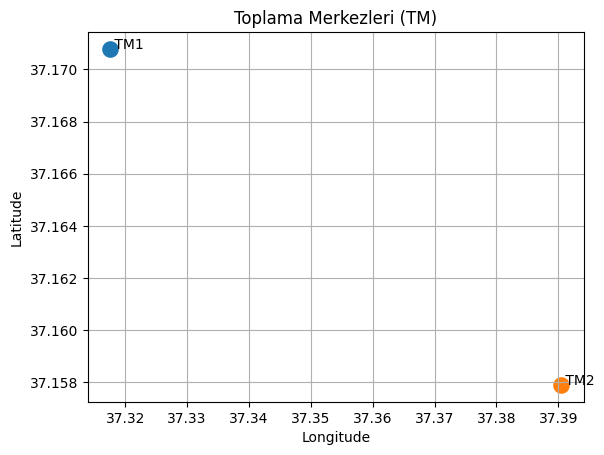

In [97]:
plt.figure()
for name, c in toplama_merkezleri.items():
    plt.scatter(c["lon"], c["lat"], s=120)
    plt.text(c["lon"], c["lat"], f" {name}", fontsize=10)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Toplama Merkezleri (TM)")
plt.grid(True)
plt.show()


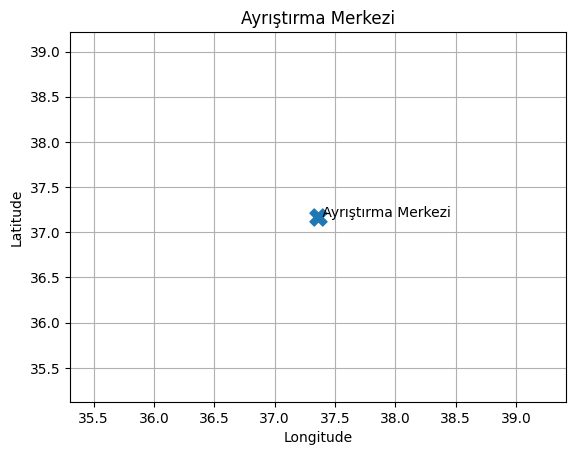

In [102]:
plt.figure()

plt.scatter(
    ayristirma_merkezi["lon"],
    ayristirma_merkezi["lat"],
    s=150,
    marker="X"
)

plt.text(
    ayristirma_merkezi["lon"],
    ayristirma_merkezi["lat"],
    " Ayrıştırma Merkezi",
    fontsize=10
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Ayrıştırma Merkezi")
plt.grid(True)
plt.show()



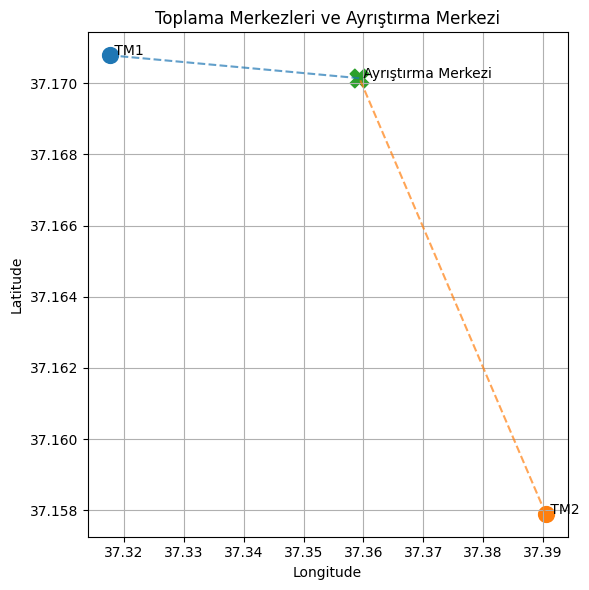

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

# --- Toplama Merkezleri ---
for name, c in toplama_merkezleri.items():
    plt.scatter(c["lon"], c["lat"], s=130)
    plt.text(c["lon"], c["lat"], f" {name}", fontsize=10)

# --- Ayrıştırma Merkezi ---
plt.scatter(
    ayristirma_merkezi["lon"],
    ayristirma_merkezi["lat"],
    s=180,
    marker="X"
)

plt.text(
    ayristirma_merkezi["lon"],
    ayristirma_merkezi["lat"],
    " Ayrıştırma Merkezi",
    fontsize=10
)

# --- TM → Ayrıştırma Merkezi bağlantıları ---
for c in toplama_merkezleri.values():
    plt.plot(
        [c["lon"], ayristirma_merkezi["lon"]],
        [c["lat"], ayristirma_merkezi["lat"]],
        linestyle="--",
        alpha=0.7
    )

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Toplama Merkezleri ve Ayrıştırma Merkezi")
plt.grid(True)
plt.tight_layout()
plt.show()


# 2. Sequential / First-Fit CVRP Heuristic
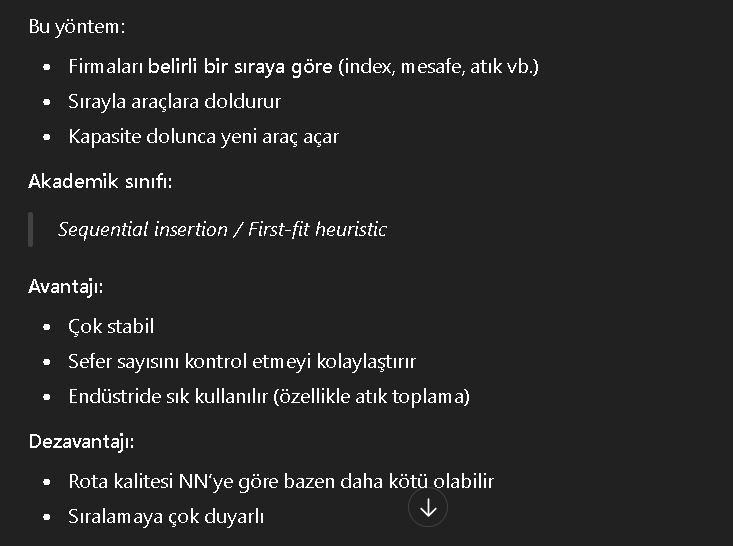

Bu yöntem özellikle atık toplama ve lojistikte çok yaygın.
“Sequential/First-Fit heuristic, CVRP’de operasyonel olarak en çok kullanılan yapıcı sezgisel yöntemlerden biridir.”

https://link.springer.com/book/10.1007/978-0-387-77778-8

https://www.kaggle.com/code/saumyajitdas/vehicle-routing-problem

# Capacitated Vehicle Routing Problem (CVRP)

➡️ En temel ve yaygın VRP türüdür
➡️ Araç kapasiteleri, yük toplama ağacı ve rotalama maliyetini minimize eder
➡️ Özellikle sanayi atık toplama bağlamında literatürde çok kullanılır

https://en.wikipedia.org/wiki/Vehicle_routing_problem?utm_source=

Bu tarz büyük ölçekli VRP’ler (ör. 200+ müşteri) için akademik literatürde:
Meta-heuristik / Sezgisel Yöntemler
Genetic Algorithms (GA)
Ant Colony Optimization (ACO)
Tabu Search (TS)
Large Neighborhood Search
hem kesin olmayan ama yüksek kalitede çözümler sağlar.
Bu, özellikle NP-hard problemler için çok yaygın.

https://www.researchgate.net/publication/396493531_Literature_Review_on_Vehicle_Routing_Problem_Approaches_Algorithms_and_Current_Challenges

Temel VRP & CVRP:
Toth & Vigo. “The Vehicle Routing Problem”, SIAM Monographs — klasik referans (geniş VRP taksonomisi). 
Ateene Ekonomi Üniversitesi

CVRP meta-heuristic uygulamaları:
Vinícius R. Máximo & Mariá C. V. Nascimento, Hybrid Adaptive Iterated Local Search for CVRP. 
arXiv

Atık toplama VRP literatür taraması:
Hui Han & Eva Ponce-Cueto, Waste Collection Vehicle Routing Problem: A Literature Review. 
ResearchGate

Yeşil / çevresel rotalama:
M. Asghari et al., Green Vehicle Routing Problem: State-of-the-Art Review. 
ScienceDirect

Genel VRP literatür taraması:
X. Liu et al., Systematic Literature Review of Vehicle Routing Problems with Time Windows. 
MDPI

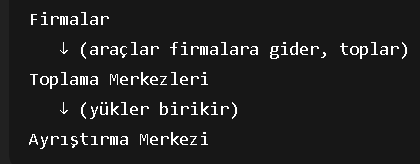

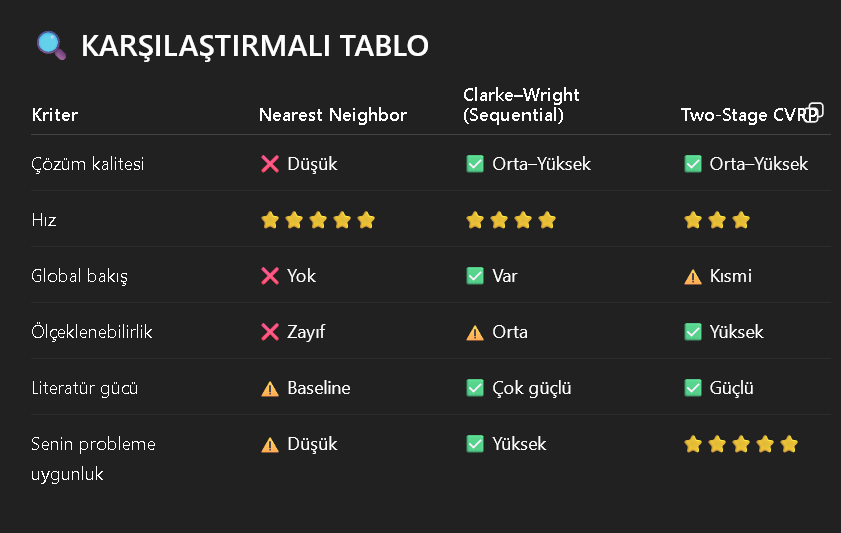

# Two echelon CVRP

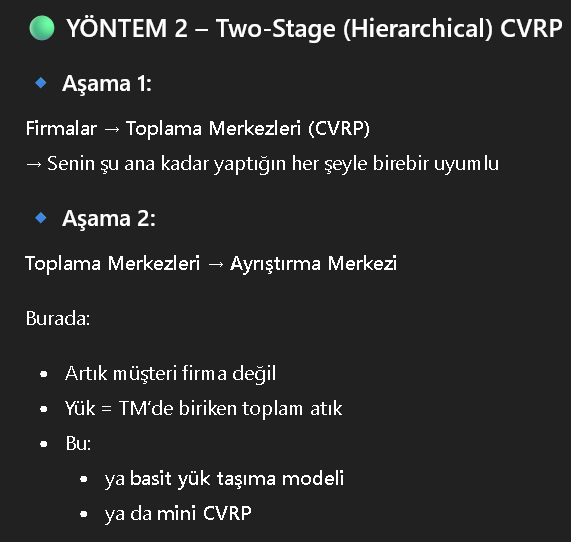

Bu derleme, iki seviyeli CVRP ve varyantlarının matematiksel modellerini, çözüm yöntemlerini ve benchmark verilerini açıklar. Tezimin VRP kısmını bu sınıflandırma çerçevesine oturtuyorum.

https://www.researchgate.net/publication/358797818_Two-Echelon_Vehicle_Routing_Problems_A_Literature_Review

https://www.researchgate.net/publication/358797818_Two-Echelon_Vehicle_Routing_Problems_A_Literature_Review

https://www.researchgate.net/publication/358797818_Two-Echelon_Vehicle_Routing_Problems_A_Literature_Review

https://ideas.repec.org/a/eee/soceps/v102y2025ics0038012125001375.html?utm_source=

https://www.econstor.eu/bitstream/10419/325785/1/S2214716024000071.pdf?utm_source=

A sustainable Two-Echelon waste collection routing
Bu çalışmada:
Atık toplama için İki Aşamalı model (2E-WCVRP) oluşturulmuş
İlk aşamada atık toplayıcılar (picker), ikinci aşamada şehir araçları kullanılıyor
Sürdürülebilirlik / ekonomik ve çevresel etkiler entegre edilmiş
Bu, senin problem bağlamına çok yakın bir gerçek dünya örneğidir.

https://ideas.repec.org/a/eee/soceps/v102y2025ics0038012125001375.html?utm_source=

https://ideas.repec.org/a/eee/soceps/v102y2025ics0038012125001375.html?utm_source=

A two-echelon location-routing model for recycling logistics
Bu makalede:
İki seviyeli lokasyon-rotalama problemi kurulur
Hem toplama noktaları hem transfer merkezleri optimize edilir
Heuristik algoritmalarla çözülür
Bu, toplama merkezlerinin yer seçimi + rotalama bileşenini birlikte ele alır, senin tez modeline çok uygundur. 

https://www.scribd.com/document/829546114/2016-Vidovic-et-al-A-two-echelon-location-routing-model-for-designing-recycling-logistics?utm_source=chatgpt.com

Vehicle Routing Problem CVRP using Google OR-Tools
Bu Kaggle not defteri:
CVRP’yi Google OR-Tools ile çözer
Firmalara rota üretir
Araç kapasiteleri ve toplam mesafe optimizasyonu yapar
Bunlar, temel VRP modellemeleri için çok iyi referans kodlardır.

https://www.kaggle.com/code/arjunanc/vehicle-routing-problem-cvrp-using-google-or-tools?utm_source=chatgpt.com

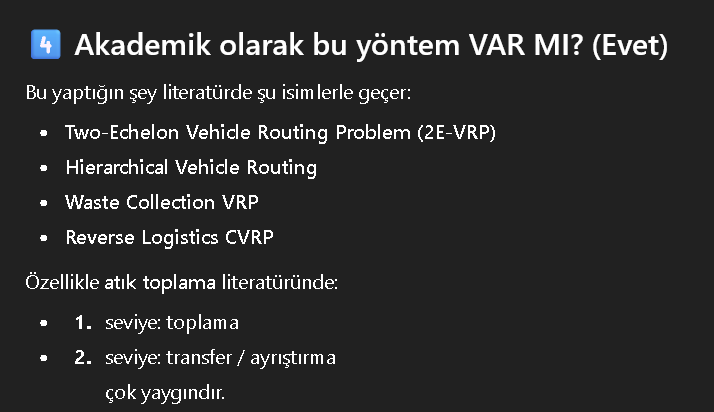

“Atık toplama süreci iki aşamalı olarak ele alınmıştır. İlk aşamada firmalardan toplama merkezlerine yapılan taşıma, Capacitated Vehicle Routing Problem (CVRP) olarak modellenmiştir. İkinci aşamada ise toplama merkezlerinde biriken atıkların ayrıştırma merkezine taşınması ele alınmıştır. Bu yapı, literatürde two-echelon vehicle routing yaklaşımıyla örtüşmektedir.”

In [440]:
ARAC_SAYISI = 2
KAPASITE = 250          # kg
KM_MALIYET = 5          # TL/km

# Eğer TM->Ayrıştırma seferinde aracın geri dönmesini de saymak istersen True yap
ROUND_TRIP_TM_SEP = True

print(
    "TM1->SEP (km):",
    haversine_km_simple(
        toplama_merkezleri["TM1"]["lat"],
        toplama_merkezleri["TM1"]["lon"],
        ayristirma_merkezi["lat"],
        ayristirma_merkezi["lon"]
    )
)

print(
    "TM2->SEP (km):",
    haversine_km_simple(
        toplama_merkezleri["TM2"]["lat"],
        toplama_merkezleri["TM2"]["lon"],
        ayristirma_merkezi["lat"],
        ayristirma_merkezi["lon"]
    )
)

print("SEP coord:", ayristirma_merkezi)
print("TM1 coord:", toplama_merkezleri["TM1"])
print("TM2 coord:", toplama_merkezleri["TM2"])


TM1->SEP (km): 3.6996705969620978
TM2->SEP (km): 3.0757521157819028
SEP coord: {'lat': 37.17013877448276, 'lon': 37.35933680586207}
TM1 coord: {'lat': 37.17078301, 'lon': 37.31758986}
TM2 coord: {'lat': 37.15790409, 'lon': 37.3904671}


In [332]:
def haversine_km(lat1, lon1, lat2, lon2):
    R = 6371.0
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    dphi = math.radians(lat2 - lat1)
    dl = math.radians(lon2 - lon1)
    a = math.sin(dphi/2)**2 + math.cos(phi1)*math.cos(phi2)*math.sin(dl/2)**2
    return 2 * R * math.asin(math.sqrt(a))

In [333]:
def enrich_cluster_with_coords(cluster_df, df):
    out = cluster_df.copy()
    out["LATITUDE"] = df.loc[out["firm_id"], "LATITUDE"].values
    out["LONGITUDE"] = df.loc[out["firm_id"], "LONGITUDE"].values
    return out

In [334]:
#Rota km hesabı (TM → firmalar → TM)
def route_distance_km(route_firm_ids, df, tm_lat, tm_lon):
    """TM'den çıkar, sırayla firmalara uğra, TM'ye dön."""
    if len(route_firm_ids) == 0:
        return 0.0

    total = 0.0
    # TM -> ilk
    first = route_firm_ids[0]
    total += haversine_km(tm_lat, tm_lon, df.loc[first, "LATITUDE"], df.loc[first, "LONGITUDE"])

    # aralar
    for a, b in zip(route_firm_ids[:-1], route_firm_ids[1:]):
        total += haversine_km(df.loc[a, "LATITUDE"], df.loc[a, "LONGITUDE"],
                              df.loc[b, "LATITUDE"], df.loc[b, "LONGITUDE"])
    # son -> TM
    last = route_firm_ids[-1]
    total += haversine_km(df.loc[last, "LATITUDE"], df.loc[last, "LONGITUDE"], tm_lat, tm_lon)

In [335]:
import math

def two_echelon_tm_to_sep(
    tm_name,
    tm_lat, tm_lon,
    sep_lat, sep_lon,
    total_load,
    capacity=250,
    km_cost=5,
    trip_cost=100,
    round_trip=True
):
    # Sefer sayısı
    trips = math.ceil(total_load / capacity)

    # Mesafe
    one_way_km = haversine_km_simple(tm_lat, tm_lon, sep_lat, sep_lon)
    km_per_trip = 2 * one_way_km if round_trip else one_way_km

    total_km = trips * km_per_trip
    total_cost = total_km * km_cost + trips * trip_cost

    return {
        "Toplama Merkezi": tm_name,
        "Toplam Yük": total_load,
        "Sefer Sayısı": trips,
        "Tek Yön Mesafe (km)": one_way_km,
        "Toplam km": total_km,
        "Toplam Maliyet (TL)": total_cost
    }


In [336]:
tm1_result = two_echelon_tm_to_sep(
    "TM1",
    toplama_merkezleri["TM1"]["lat"],
    toplama_merkezleri["TM1"]["lon"],
    ayristirma_merkezi["lat"],
    ayristirma_merkezi["lon"],
    tm1_yuk
)

tm2_result = two_echelon_tm_to_sep(
    "TM2",
    toplama_merkezleri["TM2"]["lat"],
    toplama_merkezleri["TM2"]["lon"],
    ayristirma_merkezi["lat"],
    ayristirma_merkezi["lon"],
    tm2_yuk
)


In [337]:

def build_tm_sep_trips(
    tm_name,
    total_load,
    tm_coord,
    sep_coord,
    capacity,
    km_cost,
    trip_fixed
):
    tm_lat, tm_lon = tm_coord
    sep_lat, sep_lon = sep_coord

    # TEK YÖN mesafe
    one_way_km = haversine_km_simple(tm_lat, tm_lon, sep_lat, sep_lon)

    trips = math.ceil(total_load / capacity)

    rows = []
    remaining = total_load

    for t in range(1, trips + 1):
        load_t = min(capacity, remaining)
        remaining -= load_t

        trip_cost = one_way_km * km_cost + trip_fixed

        rows.append({
            "tm": tm_name,
            "trip_no": t,
            "trip_load": load_t,
            "km": one_way_km,
            "trip_cost": trip_cost
        })

    summary = {
        "tm": tm_name,
        "total_load": total_load,
        "trips": trips,
        "one_way_km": one_way_km,
        "total_km": trips * one_way_km,
        "total_cost": trips * (one_way_km * km_cost + trip_fixed)
    }

    return pd.DataFrame(rows), summary


In [338]:
tm1_trips_df, tm1_sum = build_tm_sep_trips(
    tm_name="TM1",
    total_load=tm1_yuk,
    tm_coord=collection_center_1,
    sep_coord=separation_center,
    capacity=KAPASITE,
    km_cost=KM_MALIYET,
    trip_fixed=SEFER_SABIT
)

tm2_trips_df, tm2_sum = build_tm_sep_trips(
    tm_name="TM2",
    total_load=tm2_yuk,
    tm_coord=collection_center_2,
    sep_coord=separation_center,
    capacity=KAPASITE,
    km_cost=KM_MALIYET,
    trip_fixed=SEFER_SABIT
)


In [339]:
def schedule_trips_daily(trips_df, vehicle_count, days):
    df = trips_df.copy()
    df = df.sort_values(["tm", "trip_no"]).reset_index(drop=True)

    day_list = []
    vehicle_list = []

    day = 1
    vehicle = 1

    for _ in range(len(df)):
        day_list.append(day)
        vehicle_list.append(vehicle)

        vehicle += 1
        if vehicle > vehicle_count:
            vehicle = 1
            day += 1

    df["day"] = day_list
    df["vehicle"] = vehicle_list
    return df


In [397]:
df_tm1 = df_tm1_clean.copy()   # veya df_tm1
df_tm2 = df_tm2_clean.copy()   # veya df_tm2


In [443]:
print("TM1 firma sayısı:", len(df_tm1))
print("TM2 firma sayısı:", len(df_tm2))



TM1 firma sayısı: 190
TM2 firma sayısı: 73


In [442]:
print("TM1 yük:", df_tm1["amount_of_waste"].sum())
print("TM2 yük:", df_tm2["amount_of_waste"].sum())

TM1 yük: 15554.0
TM2 yük: 6157.0


In [400]:
tm1_ortalama_sefer_yuku = sum(
    r["toplam_yuk"] for r in rotalar_tm1
) / len(rotalar_tm1)

print("TM1 sefer sayısı:", len(rotalar_tm1))
print("TM1 ortalama sefer yükü:", tm1_ortalama_sefer_yuku)


TM1 sefer sayısı: 76
TM1 ortalama sefer yükü: 204.6578947368421


In [401]:
tm2_ortalama_sefer_yuku = sum(
    r["toplam_yuk"] for r in rotalar_tm2
) / len(rotalar_tm2)

print("TM2 sefer sayısı:", len(rotalar_tm2))
print("TM2 ortalama sefer yükü:", tm2_ortalama_sefer_yuku)


TM2 sefer sayısı: 33
TM2 ortalama sefer yükü: 186.57575757575756


In [402]:
tm1_toplam_km = sum(r["toplam_km"] for r in rotalar_tm1)
tm1_firma_maliyeti = tm1_toplam_km * KM_MALIYET_FIRMA

print("TM1 toplam km:", round(tm1_toplam_km, 2))
print("TM1 firma maliyeti:", round(tm1_firma_maliyeti, 2), "TL")



TM1 toplam km: 1097.32
TM1 firma maliyeti: 5486.6 TL


In [404]:
tm2_toplam_km = sum(r["toplam_km"] for r in rotalar_tm2)
tm2_firma_maliyeti = tm2_toplam_km * KM_MALIYET_FIRMA

print("TM2 toplam km:", round(tm2_toplam_km, 2))
print("TM2 firma maliyeti:", round(tm2_firma_maliyeti, 2), "TL")



TM2 toplam km: 514.02
TM2 firma maliyeti: 2570.1 TL


Firmalar → TM

In [446]:
def sefer_ozet_tablosu(rotalar, tm_adi, km_maliyet):
    rows = []
    for r in rotalar:
        rows.append({
            "TM": tm_adi,
            "Sefer_No": r["sefer"],
            "Toplam_Yuk_kg": r["toplam_yuk"],
            "Mesafe_km": r["toplam_km"],
            "Maliyet_TL": r["toplam_km"] * km_maliyet,
            "Firma_Sayisi": len(r["firmalar"])
        })
    return pd.DataFrame(rows)


In [508]:
df_sefer_tm1 = sefer_ozet_tablosu(
    rotalar_tm1,
    tm_adi="TM1",
    km_maliyet=KM_MALIYET_FIRMA
)
df_firma_tm_ozet = pd.concat(
    [df_sefer_tm1],
    ignore_index=True
)

df_firma_tm_ozet



,TM,Sefer_No,Toplam_Yuk_kg,Mesafe_km,Maliyet_TL,Firma_Sayisi
0,TM1,1,248.0,185.79,928.95,3
1,TM1,2,201.0,12.23,61.15,2
2,TM1,3,217.0,15.73,78.65,3
3,TM1,4,237.0,15.57,77.85,3
4,TM1,5,245.0,22.48,112.40,4
...,...,...,...,...,...,...
71,TM1,72,243.0,14.99,74.95,3
72,TM1,73,231.0,15.80,79.00,3
73,TM1,74,222.0,18.76,93.80,3
74,TM1,75,238.0,12.01,60.05,2


In [509]:
df_sefer_tm2 = sefer_ozet_tablosu(
    rotalar_tm2,
    tm_adi="TM2",
    km_maliyet=KM_MALIYET_FIRMA
)
df_firma_tm_ozet = pd.concat(
    [df_sefer_tm2],
    ignore_index=True
)

df_firma_tm_ozet


,TM,Sefer_No,Toplam_Yuk_kg,Mesafe_km,Maliyet_TL,Firma_Sayisi
0,TM2,1,132.0,20.25,101.25,2
1,TM2,2,149.0,14.64,73.20,1
2,TM2,3,209.0,34.74,173.70,2
3,TM2,4,230.0,51.63,258.15,3
4,TM2,5,231.0,8.19,40.95,2
5,TM2,6,162.0,26.27,131.35,2
6,TM2,7,184.0,36.16,180.80,2
7,TM2,8,211.0,21.14,105.70,2
8,TM2,9,169.0,27.83,139.15,2
9,TM2,10,230.0,47.08,235.40,4


TM → Ayrıştırma Merkezi

In [466]:
import math
from math import radians, cos, sin, asin, sqrt
import pandas as pd

def haversine_km(lat1, lon1, lat2, lon2):
    R = 6371.0
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    return R * c

def build_tm_to_sep_trips(
    tm_name,
    total_load,
    tm_coord,
    sep_coord,
    capacity,
    km_cost,
    trip_fixed=0
):
    # TEK YÖN
    tek_yon_km = haversine_km(
        tm_coord["lat"], tm_coord["lon"],
        sep_coord["lat"], sep_coord["lon"]
    )

    # GİDİŞ–DÖNÜŞ (Sequential ile TUTARLI)
    mesafe_km = 2 * tek_yon_km

    sefer_sayisi = math.ceil(total_load / capacity)

    rows = []
    for i in range(sefer_sayisi):
        kalan = total_load - i * capacity
        tasinan = capacity if kalan >= capacity else kalan

        rows.append({
            "TM": tm_name,
            "Sefer_No": i + 1,
            "Tasinan_Yuk_kg": tasinan,
            "Mesafe_km": mesafe_km,
            "Maliyet_TL": mesafe_km * km_cost + trip_fixed
        })

    summary = {
        "TM": tm_name,
        "TMSEP_Sefer": sefer_sayisi,
        "TMSEP_ToplamKM": sefer_sayisi * mesafe_km,
        "TMSEP_Maliyet": sefer_sayisi * (mesafe_km * km_cost + trip_fixed)
    }

    return pd.DataFrame(rows), summary




In [468]:
# TM1 toplam yük
total_load_tm1 = df_tm1["amount_of_waste"].sum()

# TM1 → SEP
df_tm1_sep, sum_tm1_sep = build_tm_to_sep_trips(
    tm_name="TM1",
    total_load=total_load_tm1,
    tm_coord=tm1_coord,
    sep_coord=sep_coord,
    capacity=ARAC_KAPASITESI,
    km_cost=KM_MALIYET_TM,
    trip_fixed=SEFER_SABIT
)

df_tm1_sep



,TM,Sefer_No,Tasinan_Yuk_kg,Mesafe_km,Maliyet_TL
0,TM1,1,250.0,49.976138,349.880688
1,TM1,2,250.0,49.976138,349.880688
2,TM1,3,250.0,49.976138,349.880688
3,TM1,4,250.0,49.976138,349.880688
4,TM1,5,250.0,49.976138,349.880688
...,...,...,...,...,...
58,TM1,59,250.0,49.976138,349.880688
59,TM1,60,250.0,49.976138,349.880688
60,TM1,61,250.0,49.976138,349.880688
61,TM1,62,250.0,49.976138,349.880688


In [470]:
# TM2 toplam yük
total_load_tm2 = df_tm2["amount_of_waste"].sum()

# TM2 → SEP
df_tm2_sep, sum_tm2_sep = build_tm_to_sep_trips(
    tm_name="TM2",
    total_load=total_load_tm2,
    tm_coord=tm2_coord,
    sep_coord=sep_coord,
    capacity=ARAC_KAPASITESI,
    km_cost=KM_MALIYET_TM,
    trip_fixed=SEFER_SABIT
)

df_tm2_sep



,TM,Sefer_No,Tasinan_Yuk_kg,Mesafe_km,Maliyet_TL
0,TM2,1,250.0,56.307149,381.535747
1,TM2,2,250.0,56.307149,381.535747
2,TM2,3,250.0,56.307149,381.535747
3,TM2,4,250.0,56.307149,381.535747
4,TM2,5,250.0,56.307149,381.535747
5,TM2,6,250.0,56.307149,381.535747
6,TM2,7,250.0,56.307149,381.535747
7,TM2,8,250.0,56.307149,381.535747
8,TM2,9,250.0,56.307149,381.535747
9,TM2,10,250.0,56.307149,381.535747


Neden TM → Ayrıştırma seferleri aynı çıkıyor?

Çünkü senin varsayımın (ve bu gayet doğru):
Tek ayrıştırma merkezi var
TM konumu sabit
Her TM → SEP seferi aynı güzergâhı kullanıyor
Araç gidiş–dönüş yapıyor
Dolayısıyla:
Mesafe = sabit
Maliyet = sabit
Değişen tek şey:
Sefer sayısı
Son seferde taşınan yük

In [471]:
df_two_echelon_summary = pd.DataFrame([
    {
        "TM": "TM1",
        "Firma_Sefer": len(df_sefer_tm1),
        "Firma_ToplamKM": df_sefer_tm1["Mesafe_km"].sum(),
        "Firma_Maliyet": df_sefer_tm1["Maliyet_TL"].sum(),
        **sum_tm1_sep
    },
    {
        "TM": "TM2",
        "Firma_Sefer": len(df_sefer_tm2),
        "Firma_ToplamKM": df_sefer_tm2["Mesafe_km"].sum(),
        "Firma_Maliyet": df_sefer_tm2["Maliyet_TL"].sum(),
        **sum_tm2_sep
    }
])

df_two_echelon_summary


,TM,Firma_Sefer,Firma_ToplamKM,Firma_Maliyet,TMSEP_Sefer,TMSEP_ToplamKM,TMSEP_Maliyet
0,TM1,76,1097.32,5486.6,63,3148.496663,22042.483313
1,TM2,33,514.02,2570.1,25,1407.678737,9538.393685


Sefer–Firma Listesi Fonksiyonu

In [472]:
def tum_seferler_firma_listesi(rotalar, tm_adi):
    rows = []
    for r in rotalar:
        rows.append({
            "TM": tm_adi,
            "Sefer_No": r["sefer"],
            "Firma_Listesi": r["firmalar"],
            "Firma_Sayisi": len(r["firmalar"])
        })
    return pd.DataFrame(rows)


In [473]:
df_sefer_firma_tm1 = tum_seferler_firma_listesi(
    rotalar_tm1,
    "TM1"
)

df_sefer_firma = pd.concat(
    [df_sefer_firma_tm1],
    ignore_index=True
)

df_sefer_firma


,TM,Sefer_No,Firma_Listesi,Firma_Sayisi
0,TM1,1,"[0, 1, 2]",3
1,TM1,2,"[4, 5]",2
2,TM1,3,"[6, 7, 8]",3
3,TM1,4,"[10, 11, 12]",3
4,TM1,5,"[13, 14, 15, 17]",4
...,...,...,...,...
71,TM1,72,"[246, 247, 248]",3
72,TM1,73,"[251, 252, 253]",3
73,TM1,74,"[254, 255, 256]",3
74,TM1,75,"[257, 259]",2


In [474]:
df_sefer_firma_tm2 = tum_seferler_firma_listesi(
    rotalar_tm2,
    "TM2"
)

df_sefer_firma = pd.concat(
    [df_sefer_firma_tm2],
    ignore_index=True
)

df_sefer_firma


,TM,Sefer_No,Firma_Listesi,Firma_Sayisi
0,TM2,1,"[3, 9]",2
1,TM2,2,[16],1
2,TM2,3,"[18, 21]",2
3,TM2,4,"[26, 27, 29]",3
4,TM2,5,"[37, 52]",2
5,TM2,6,"[57, 58]",2
6,TM2,7,"[72, 74]",2
7,TM2,8,"[84, 85]",2
8,TM2,9,"[95, 99]",2
9,TM2,10,"[100, 108, 111, 123]",4


In [476]:
df_uzun = pd.DataFrame([
    # TM1
    {
        "TM": "TM1",
        "Asama": "TM-Firma",
        "Sefer": len(rotalar_tm1),
        "ToplamKM": tm1_toplam_km,
        "Maliyet": tm1_firma_maliyeti
    },
    {
        "TM": "TM1",
        "Asama": "TM-SEP",
        "Sefer": df_ozet.loc[0, "TMSEP_Sefer"],
        "ToplamKM": df_ozet.loc[0, "TMSEP_ToplamKM"],
        "Maliyet": df_ozet.loc[0, "TMSEP_Maliyet"]
    },

    # TM2
    {
        "TM": "TM2",
        "Asama": "TM-Firma",
        "Sefer": len(rotalar_tm2),
        "ToplamKM": tm2_toplam_km,
        "Maliyet": tm2_firma_maliyeti
    },
    {
        "TM": "TM2",
        "Asama": "TM-SEP",
        "Sefer": df_ozet.loc[1, "TMSEP_Sefer"],
        "ToplamKM": df_ozet.loc[1, "TMSEP_ToplamKM"],
        "Maliyet": df_ozet.loc[1, "TMSEP_Maliyet"]
    }
])

df_uzun


,TM,Asama,Sefer,ToplamKM,Maliyet
0,TM1,TM-Firma,76,1097.32,5486.60
1,TM1,TM-SEP,63,466.20,8631.00
2,TM2,TM-Firma,33,514.02,2570.10
3,TM2,TM-SEP,25,153.75,3268.75


In [485]:
total_load_tm1 = df_tm1["amount_of_waste"].sum()
total_load_tm2 = df_tm2["amount_of_waste"].sum()

print(total_load_tm1, total_load_tm2)


15554.0 6157.0


In [486]:
total_load_tm1 = df_tm1["amount_of_waste"].sum()
total_load_tm2 = df_tm2["amount_of_waste"].sum()

print(total_load_tm1, total_load_tm2)


15554.0 6157.0


In [487]:
df_tm1_sep, tm1_sep_sum = build_tm_to_sep_trips(
    tm_name="TM1",
    total_load=total_load_tm1,
    tm_coord=tm1_coord,
    sep_coord=sep_coord,
    capacity=ARAC_KAPASITESI,
    km_cost=KM_MALIYET_TM,
    trip_fixed=SEFER_SABIT
)

df_tm2_sep, tm2_sep_sum = build_tm_to_sep_trips(
    tm_name="TM2",
    total_load=total_load_tm2,
    tm_coord=tm2_coord,
    sep_coord=sep_coord,
    capacity=ARAC_KAPASITESI,
    km_cost=KM_MALIYET_TM,
    trip_fixed=SEFER_SABIT
)


In [496]:

# Firma -> TM maliyetleri
tm1_firma_maliyet = df_uzun.loc[
    (df_uzun["TM"]=="TM1") & (df_uzun["Asama"]=="TM-Firma"),
    "Maliyet"
].iloc[0]

tm2_firma_maliyet = df_uzun.loc[
    (df_uzun["TM"]=="TM2") & (df_uzun["Asama"]=="TM-Firma"),
    "Maliyet"
].iloc[0]

# TM -> SEP maliyetleri
tm1_sep_maliyet = df_uzun.loc[
    (df_uzun["TM"]=="TM1") & (df_uzun["Asama"]=="TM-SEP"),
    "Maliyet"
].iloc[0]

tm2_sep_maliyet = df_uzun.loc[
    (df_uzun["TM"]=="TM2") & (df_uzun["Asama"]=="TM-SEP"),
    "Maliyet"
].iloc[0]

# Toplamlar
firma_toplam_maliyet = tm1_firma_maliyet + tm2_firma_maliyet
tm_sep_toplam_maliyet = tm1_sep_maliyet + tm2_sep_maliyet
toplam_sistem_maliyeti = firma_toplam_maliyet + tm_sep_toplam_maliyet

# Yazdırma
print("GENEL SISTEM MALIYETI OZETI (VRP + TM->SEP)")
print("-----------------------------------------")
print(f"TM1 -> Firmalar maliyet: {tm1_firma_maliyet:,.2f} TL")
print(f"TM2 -> Firmalar maliyet: {tm2_firma_maliyet:,.2f} TL")
print(f"TM1 -> Ayrıştırma maliyet: {tm1_sep_maliyet:,.2f} TL")
print(f"TM2 -> Ayrıştırma maliyet: {tm2_sep_maliyet:,.2f} TL")
print("-----------------------------------------")
print(f"TOPLAM FIRMA MALIYETI: {firma_toplam_maliyet:,.2f} TL")
print(f"TOPLAM TM->AYRISTIRMA: {tm_sep_toplam_maliyet:,.2f} TL")
print("-----------------------------------------")
print(f"TOPLAM SISTEM MALIYETI: {toplam_sistem_maliyeti:,.2f} TL")


GENEL SISTEM MALIYETI OZETI (VRP + TM->SEP)
-----------------------------------------
TM1 -> Firmalar maliyet: 5,486.60 TL
TM2 -> Firmalar maliyet: 2,570.10 TL
TM1 -> Ayrıştırma maliyet: 8,631.00 TL
TM2 -> Ayrıştırma maliyet: 3,268.75 TL
-----------------------------------------
TOPLAM FIRMA MALIYETI: 8,056.70 TL
TOPLAM TM->AYRISTIRMA: 11,899.75 TL
-----------------------------------------
TOPLAM SISTEM MALIYETI: 19,956.45 TL


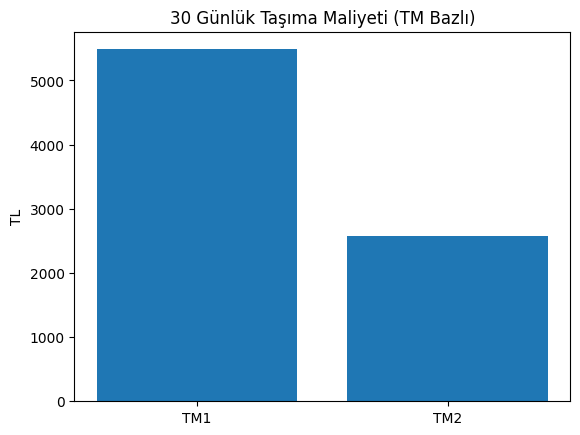

In [497]:
tm_costs = {
    "TM1": tm1_sefer_df["maliyet"].sum(),
    "TM2": tm2_sefer_df["maliyet"].sum()
}

plt.figure()
plt.bar(tm_costs.keys(), tm_costs.values())
plt.title("30 Günlük Taşıma Maliyeti (TM Bazlı)")
plt.ylabel("TL")
plt.show()



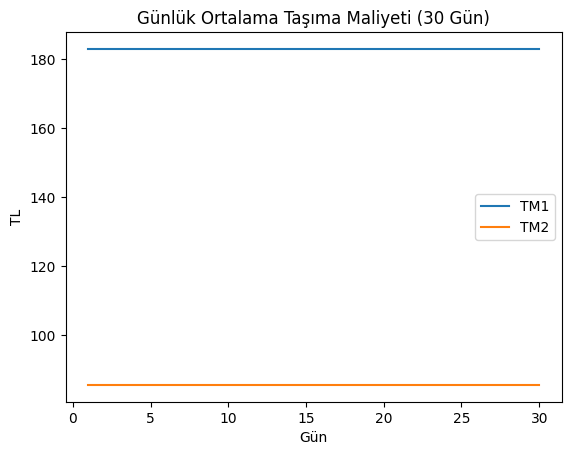

In [498]:
import numpy as np

days = np.arange(1, 31)
tm1_daily = np.repeat(tm1_firma_maliyeti/30, 30)
tm2_daily = np.repeat(tm2_firma_maliyet/30, 30)

plt.figure()
plt.plot(days, tm1_daily, label="TM1")
plt.plot(days, tm2_daily, label="TM2")
plt.title("Günlük Ortalama Taşıma Maliyeti (30 Gün)")
plt.xlabel("Gün")
plt.ylabel("TL")
plt.legend()
plt.show()


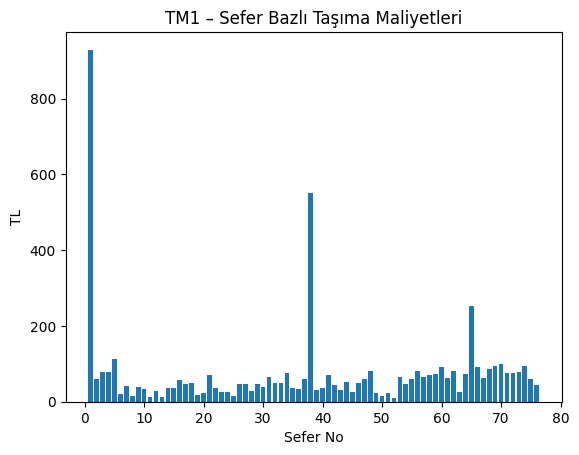

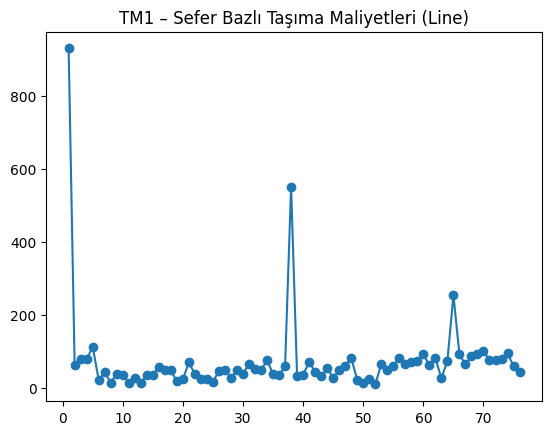

In [499]:
plt.figure()
plt.bar(tm1_sefer_df["sefer"], tm1_sefer_df["maliyet"])
plt.title("TM1 – Sefer Bazlı Taşıma Maliyetleri")
plt.xlabel("Sefer No")
plt.ylabel("TL")
plt.show()

plt.figure()
plt.plot(tm1_sefer_df["sefer"], tm1_sefer_df["maliyet"], marker="o")
plt.title("TM1 – Sefer Bazlı Taşıma Maliyetleri (Line)")
plt.show()


In [532]:
# TM → Firmalar (30 günlük)
tm1_firma_maliyet_aylik = tm1_firma_maliyeti * 30
tm2_firma_maliyet_aylik = tm2_firma_maliyeti * 30

# TM → Ayrıştırma (30 günlük)
tm1_sep_maliyet_aylik = tm1_sep_sum["TMSEP_Maliyet"] * 30
tm2_sep_maliyet_aylik = tm2_sep_sum["TMSEP_Maliyet"] * 30


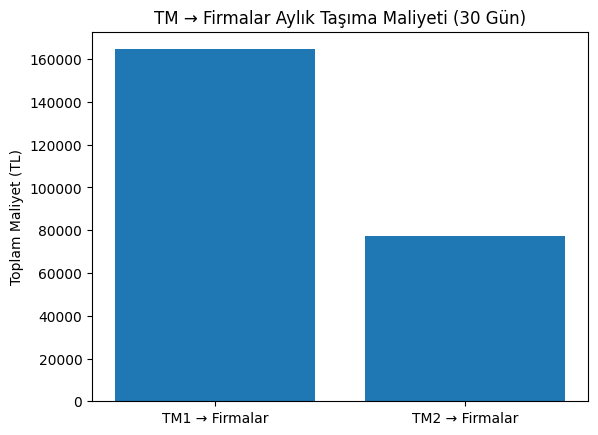

In [530]:
import matplotlib.pyplot as plt

labels = ["TM1 → Firmalar", "TM2 → Firmalar"]
values = [tm1_firma_maliyet_aylik, tm2_firma_maliyet_aylik]

plt.figure()
plt.bar(labels, values)
plt.ylabel("Toplam Maliyet (TL)")
plt.title("TM → Firmalar Aylık Taşıma Maliyeti (30 Gün)")
plt.show()


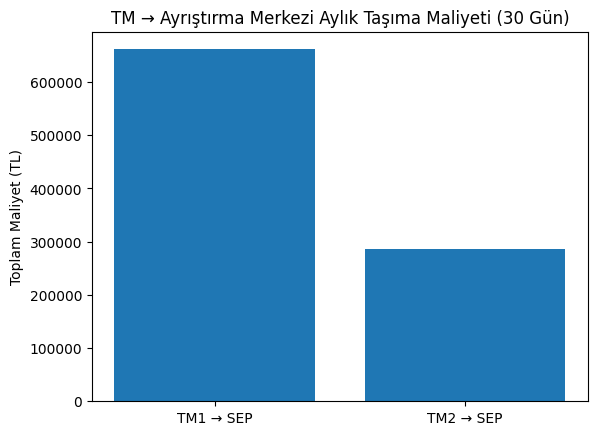

In [533]:
labels = ["TM1 → SEP", "TM2 → SEP"]
values = [tm1_sep_maliyet_aylik, tm2_sep_maliyet_aylik]

plt.figure()
plt.bar(labels, values)
plt.ylabel("Toplam Maliyet (TL)")
plt.title("TM → Ayrıştırma Merkezi Aylık Taşıma Maliyeti (30 Gün)")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13080\838916747.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


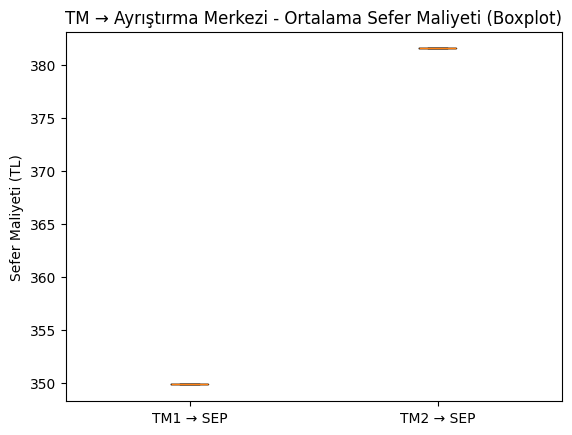

In [534]:
tm1_sep_sefer_maliyetleri = df_tm1_sep["Maliyet_TL"]
tm2_sep_sefer_maliyetleri = df_tm2_sep["Maliyet_TL"]

plt.figure()
plt.boxplot(
    [tm1_sep_sefer_maliyetleri, tm2_sep_sefer_maliyetleri],
    labels=["TM1 → SEP", "TM2 → SEP"]
)
plt.ylabel("Sefer Maliyeti (TL)")
plt.title("TM → Ayrıştırma Merkezi - Ortalama Sefer Maliyeti (Boxplot)")
plt.show()


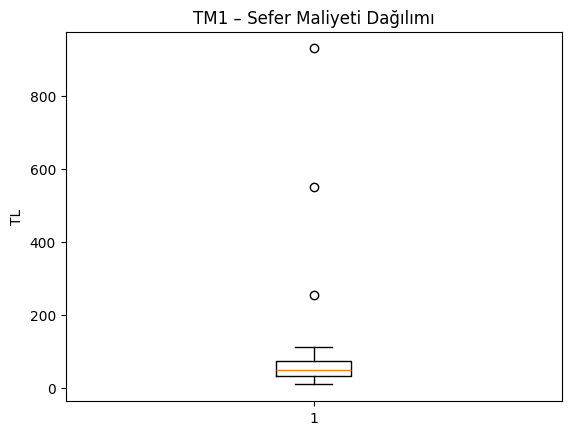

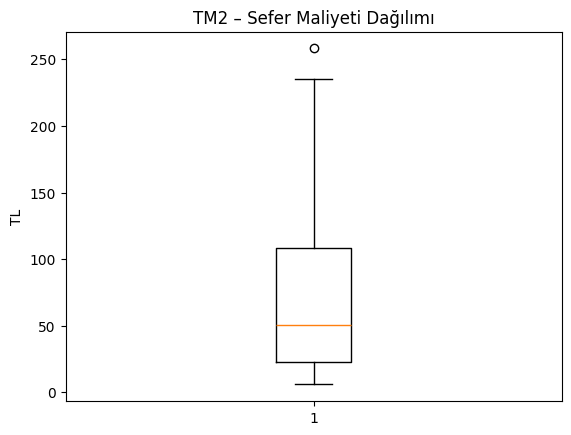

In [500]:
plt.figure()
plt.boxplot(tm1_sefer_df["maliyet"])
plt.title("TM1 – Sefer Maliyeti Dağılımı")
plt.ylabel("TL")
plt.show()

plt.figure()
plt.boxplot(tm2_sefer_df["maliyet"])
plt.title("TM2 – Sefer Maliyeti Dağılımı")
plt.ylabel("TL")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13080\3678525499.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


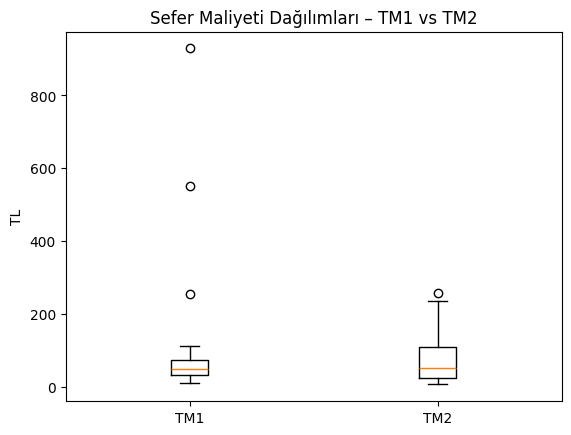

In [501]:
plt.figure()
plt.boxplot(
    [tm1_sefer_df["maliyet"], tm2_sefer_df["maliyet"]],
    labels=["TM1", "TM2"]
)
plt.title("Sefer Maliyeti Dağılımları – TM1 vs TM2")
plt.ylabel("TL")
plt.show()


# Sequential / First-Fit CVRP Heuristic

In [136]:
ARAC_SAYISI = 2
KAPASITE = 250  # kg
ROUND_TRIP_TM_SEP = True


In [137]:
#Mesafe fonksiyonu
import math

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # km
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    dphi = math.radians(lat2 - lat1)
    dl   = math.radians(lon2 - lon1)

    a = math.sin(dphi/2)**2 + math.cos(phi1)*math.cos(phi2)*math.sin(dl/2)**2
    c = 2 * math.asin(math.sqrt(a))
    return R * c


In [148]:
def sequential_cvrp_routes_distance(df, kapasite):
    rotalar = []
    kalan = df.copy().reset_index(drop=True)

    sefer_no = 1
    while not kalan.empty:
        yuk = 0
        km = 0
        rota_firmalar = []
        silinecek = []

        for i, row in kalan.iterrows():
            if yuk + row["amount_of_waste"] <= kapasite:
                yuk += row["amount_of_waste"]
                km += 2 * row["distance_km"]  # TM → Firma → TM
                rota_firmalar.append(row["firm_id"])
                silinecek.append(i)
            else:
                break

        rotalar.append({
            "sefer": sefer_no,
            "firmalar": rota_firmalar,
            "toplam_yuk": round(yuk, 2),
            "toplam_km": round(km, 2)
        })

        kalan = kalan.drop(silinecek).reset_index(drop=True)
        sefer_no += 1

    return rotalar


In [185]:
def yazdir_rotalar(tm_adi, rotalar, km_maliyet=None):
    for i, r in enumerate(rotalar, start=1):
        print(
            f"{tm_adi} - Araç {i}: "
            f"Firma sayısı={len(r['firmalar'])} | "
            f"Toplam yük={r['toplam_yuk']} kg | "
            f"Toplam km={r['toplam_km']:.2f}"
        )

    if km_maliyet is not None:
        print("\n--- SEFER DETAYLARI ---")
        for i, r in enumerate(rotalar, start=1):
            maliyet = r["toplam_km"] * km_maliyet
            print(
                f"{tm_adi} - Sefer {i}: "
                f"Yük={r['toplam_yuk']} kg | "
                f"Mesafe={r['toplam_km']:.2f} km | "
                f"Maliyet={maliyet:.2f} TL"
            )


In [192]:
for name, obj in list(globals().items()):
    if hasattr(obj, "columns"):
        if "center_name" in obj.columns and "amount_of_waste" in obj.columns:
            print(name, obj.shape)


___ (5, 6)
assign_df (263, 7)
_29 (5, 6)
cluster_1 (190, 7)
cluster_2 (73, 7)
_53 (5, 7)
df_tm1 (0, 11)
df_tm2 (73, 7)


In [193]:
df_tm1_clean = cluster_1.copy()
df_tm2_clean = cluster_2.copy()


In [194]:
print("TM1 firma sayısı:", df_tm1_clean.shape[0])
print("TM2 firma sayısı:", df_tm2_clean.shape[0])


TM1 firma sayısı: 190
TM2 firma sayısı: 73


In [195]:
rotalar_tm1 = sequential_cvrp_routes_distance(
    df_tm1_clean,
    KAPASITE
)

rotalar_tm2 = sequential_cvrp_routes_distance(
    df_tm2_clean,
    KAPASITE
)


In [196]:
print("TM1 sefer:", len(rotalar_tm1))
print("TM2 sefer:", len(rotalar_tm2))


TM1 sefer: 76
TM2 sefer: 33


In [197]:
r = {
    "sefer": int,
    "firmalar": list,
    "toplam_yuk": float,
    "toplam_km": float
}


In [198]:
import pandas as pd

def sefer_ozet_tablosu(rotalar, tm_adi, km_maliyet):
    rows = []
    for i, r in enumerate(rotalar, start=1):
        rows.append({
            "TM": tm_adi,
            "Sefer_No": i,
            "Toplam_Yuk_kg": r["toplam_yuk"],
            "Mesafe_km": round(r["toplam_km"], 2),
            "Maliyet_TL": round(r["toplam_km"] * km_maliyet, 2),
            "Firma_Sayisi": len(r["firmalar"])
        })
    return pd.DataFrame(rows)


In [201]:
df_sefer_tm1 = sefer_ozet_tablosu(rotalar_tm1, "TM1", KM_MALIYET_FIRMA)

df_sefer_ozet = pd.concat([df_sefer_tm1],ignore_index=True)
df_sefer_ozet



,TM,Sefer_No,Toplam_Yuk_kg,Mesafe_km,Maliyet_TL,Firma_Sayisi
0,TM1,1,248.0,185.79,928.95,3
1,TM1,2,201.0,12.23,61.15,2
2,TM1,3,217.0,15.73,78.65,3
3,TM1,4,237.0,15.57,77.85,3
4,TM1,5,245.0,22.48,112.40,4
...,...,...,...,...,...,...
71,TM1,72,243.0,14.99,74.95,3
72,TM1,73,231.0,15.80,79.00,3
73,TM1,74,222.0,18.76,93.80,3
74,TM1,75,238.0,12.01,60.05,2


In [205]:
df_sefer_tm2 = sefer_ozet_tablosu(rotalar_tm2, "TM2", KM_MALIYET_FIRMA)
df_sefer_ozet = pd.concat([df_sefer_tm2], ignore_index=True)
df_sefer_ozet


,TM,Sefer_No,Toplam_Yuk_kg,Mesafe_km,Maliyet_TL,Firma_Sayisi
0,TM2,1,132.0,20.25,101.25,2
1,TM2,2,149.0,14.64,73.20,1
2,TM2,3,209.0,34.74,173.70,2
3,TM2,4,230.0,51.63,258.15,3
4,TM2,5,231.0,8.19,40.95,2
5,TM2,6,162.0,26.27,131.35,2
6,TM2,7,184.0,36.16,180.80,2
7,TM2,8,211.0,21.14,105.70,2
8,TM2,9,169.0,27.83,139.15,2
9,TM2,10,230.0,47.08,235.40,4


In [206]:
def sefer_firma_tablosu(rotalar, tm_adi):
    rows = []
    for i, r in enumerate(rotalar, start=1):
        for firma in r["firmalar"]:
            rows.append({
                "TM": tm_adi,
                "Sefer_No": i,
                "Firma_ID": firma
            })
    return pd.DataFrame(rows)


In [216]:
df_sefer_firma_tm1 = tum_seferler_firma_listesi(rotalar_tm1, "TM1")


df_sefer_firma = pd.concat(
    [df_sefer_firma_tm1],
    ignore_index=True
)

df_sefer_firma

,TM,Sefer_No,Firma_Listesi,Firma_Sayisi
0,TM1,1,"[0, 1, 2]",3
1,TM1,2,"[4, 5]",2
2,TM1,3,"[6, 7, 8]",3
3,TM1,4,"[10, 11, 12]",3
4,TM1,5,"[13, 14, 15, 17]",4
...,...,...,...,...
71,TM1,72,"[246, 247, 248]",3
72,TM1,73,"[251, 252, 253]",3
73,TM1,74,"[254, 255, 256]",3
74,TM1,75,"[257, 259]",2


In [217]:
df_sefer_firma_tm2 = tum_seferler_firma_listesi(rotalar_tm2, "TM2")

df_sefer_firma = pd.concat(
    [df_sefer_firma_tm2],
    ignore_index=True
)

df_sefer_firma

,TM,Sefer_No,Firma_Listesi,Firma_Sayisi
0,TM2,1,"[3, 9]",2
1,TM2,2,[16],1
2,TM2,3,"[18, 21]",2
3,TM2,4,"[26, 27, 29]",3
4,TM2,5,"[37, 52]",2
5,TM2,6,"[57, 58]",2
6,TM2,7,"[72, 74]",2
7,TM2,8,"[84, 85]",2
8,TM2,9,"[95, 99]",2
9,TM2,10,"[100, 108, 111, 123]",4


In [218]:
def tm_to_sep_doldukca_sefer_uret(
    tm_adi,
    gelen_yuk_listesi,   # örn: [250, 149, 209, ...]  (TM->Firmalar seferlerinden gelen yükler)
    kapasite,
    tm_lat, tm_lon,
    sep_lat, sep_lon,
    round_trip=True,
    kalan_sonu_gonder=True
):
    # TM-SEP tek yön mesafe
    tek_yon_km = haversine_km_simple(tm_lat, tm_lon, sep_lat, sep_lon)
    sefer_km = (2 * tek_yon_km) if round_trip else tek_yon_km

    stok = 0.0
    seferler = []
    sefer_no = 1

    for yuk in gelen_yuk_listesi:
        stok += float(yuk)

        while stok >= kapasite:
            seferler.append({
                "TM": tm_adi,
                "Sefer_No": sefer_no,
                "Yuk_kg": float(kapasite),
                "Mesafe_km": round(sefer_km, 2)
            })
            stok -= kapasite
            sefer_no += 1

    # Dönem sonu stok kaldıysa (opsiyonel)
    if kalan_sonu_gonder and stok > 0:
        seferler.append({
            "TM": tm_adi,
            "Sefer_No": sefer_no,
            "Yuk_kg": round(stok, 2),
            "Mesafe_km": round(sefer_km, 2)
        })

    return seferler


In [219]:
gelen_tm1 = [r["toplam_yuk"] for r in rotalar_tm1]
gelen_tm2 = [r["toplam_yuk"] for r in rotalar_tm2]


In [220]:
KAPASITE_TM_SEP = 250  # araç kapasitesi (TM->SEP)

ROUND_TRIP_TM_SEP = True          # gidiş-dönüş sayacaksan True
KALAN_SONU_GONDER = True          # "dolmadan gitmesin" istiyorsan False yapabilirsin

tm1_sep_seferler = tm_to_sep_doldukca_sefer_uret(
    tm_adi="TM1",
    gelen_yuk_listesi=gelen_tm1,
    kapasite=KAPASITE_TM_SEP,
    tm_lat=toplama_merkezleri["TM1"]["lat"],
    tm_lon=toplama_merkezleri["TM1"]["lon"],
    sep_lat=ayristirma_merkezi["lat"],
    sep_lon=ayristirma_merkezi["lon"],
    round_trip=ROUND_TRIP_TM_SEP,
    kalan_sonu_gonder=KALAN_SONU_GONDER
)

tm2_sep_seferler = tm_to_sep_doldukca_sefer_uret(
    tm_adi="TM2",
    gelen_yuk_listesi=gelen_tm2,
    kapasite=KAPASITE_TM_SEP,
    tm_lat=toplama_merkezleri["TM2"]["lat"],
    tm_lon=toplama_merkezleri["TM2"]["lon"],
    sep_lat=ayristirma_merkezi["lat"],
    sep_lon=ayristirma_merkezi["lon"],
    round_trip=ROUND_TRIP_TM_SEP,
    kalan_sonu_gonder=KALAN_SONU_GONDER
)


Sefer Özeti (TM→SEP)

In [221]:
import pandas as pd

df_tmsep = pd.DataFrame(tm1_sep_seferler + tm2_sep_seferler)

df_tmsep


,TM,Sefer_No,Yuk_kg,Mesafe_km
0,TM1,1,250.0,7.40
1,TM1,2,250.0,7.40
2,TM1,3,250.0,7.40
3,TM1,4,250.0,7.40
4,TM1,5,250.0,7.40
...,...,...,...,...
83,TM2,21,250.0,6.15
84,TM2,22,250.0,6.15
85,TM2,23,250.0,6.15
86,TM2,24,250.0,6.15


In [222]:
tmsep_ozet = (
    df_tmsep
    .groupby("TM")
    .agg(
        TMSEP_Sefer=("Sefer_No", "count"),
        TMSEP_ToplamYuk=("Yuk_kg", "sum"),
        TMSEP_ToplamKM=("Mesafe_km", "sum")
    )
    .reset_index()
)

tmsep_ozet


,TM,TMSEP_Sefer,TMSEP_ToplamYuk,TMSEP_ToplamKM
0,TM1,63,15554.0,466.20
1,TM2,25,6157.0,153.75


In [224]:
# TM1
tm1_toplam_km = sum(r["toplam_km"] for r in rotalar_tm1)
tm1_firma_maliyeti = tm1_toplam_km * KM_MALIYET_FIRMA

# TM2
tm2_toplam_km = sum(r["toplam_km"] for r in rotalar_tm2)
tm2_firma_maliyeti = tm2_toplam_km * KM_MALIYET_FIRMA


In [225]:
# TM1
tm1_toplam_km = sum(r["toplam_km"] for r in rotalar_tm1)
tm1_firma_maliyeti = tm1_toplam_km * KM_MALIYET_FIRMA

# TM2
tm2_toplam_km = sum(r["toplam_km"] for r in rotalar_tm2)
tm2_firma_maliyeti = tm2_toplam_km * KM_MALIYET_FIRMA


In [226]:
import pandas as pd

df_ozet = pd.DataFrame([
    {
        "TM": "TM1",
        "Firma_Sefer": len(rotalar_tm1),
        "Firma_ToplamKM": round(tm1_toplam_km, 2),
        "Firma_Maliyet": round(tm1_firma_maliyeti, 2),

        "TMSEP_Sefer": tmsep_ozet.loc[tmsep_ozet["TM"]=="TM1", "TMSEP_Sefer"].values[0],
        "TMSEP_ToplamKM": round(tmsep_ozet.loc[tmsep_ozet["TM"]=="TM1", "TMSEP_ToplamKM"].values[0], 2),
        "TMSEP_Maliyet": round(
            tmsep_ozet.loc[tmsep_ozet["TM"]=="TM1", "TMSEP_ToplamKM"].values[0] * KM_MALIYET + 
            tmsep_ozet.loc[tmsep_ozet["TM"]=="TM1", "TMSEP_Sefer"].values[0] * SEFER_SABIT,
        2)
    },
    {
        "TM": "TM2",
        "Firma_Sefer": len(rotalar_tm2),
        "Firma_ToplamKM": round(tm2_toplam_km, 2),
        "Firma_Maliyet": round(tm2_firma_maliyeti, 2),

        "TMSEP_Sefer": tmsep_ozet.loc[tmsep_ozet["TM"]=="TM2", "TMSEP_Sefer"].values[0],
        "TMSEP_ToplamKM": round(tmsep_ozet.loc[tmsep_ozet["TM"]=="TM2", "TMSEP_ToplamKM"].values[0], 2),
        "TMSEP_Maliyet": round(
            tmsep_ozet.loc[tmsep_ozet["TM"]=="TM2", "TMSEP_ToplamKM"].values[0] * KM_MALIYET + 
            tmsep_ozet.loc[tmsep_ozet["TM"]=="TM2", "TMSEP_Sefer"].values[0] * SEFER_SABIT,
        2)
    }
])

df_ozet


,TM,Firma_Sefer,Firma_ToplamKM,Firma_Maliyet,TMSEP_Sefer,TMSEP_ToplamKM,TMSEP_Maliyet
0,TM1,76,1097.32,5486.6,63,466.20,8631.00
1,TM2,33,514.02,2570.1,25,153.75,3268.75


In [227]:
sistem_toplam = pd.DataFrame([{
    "Toplam_Firma_Sefer": df_ozet["Firma_Sefer"].sum(),
    "Toplam_Firma_KM": round(df_ozet["Firma_ToplamKM"].sum(), 2),
    "Toplam_Firma_Maliyet": round(df_ozet["Firma_Maliyet"].sum(), 2),

    "Toplam_TMSEP_Sefer": df_ozet["TMSEP_Sefer"].sum(),
    "Toplam_TMSEP_KM": round(df_ozet["TMSEP_ToplamKM"].sum(), 2),
    "Toplam_TMSEP_Maliyet": round(df_ozet["TMSEP_Maliyet"].sum(), 2),

    "SISTEM_TOPLAM_MALIYET": round(
        df_ozet["Firma_Maliyet"].sum() + df_ozet["TMSEP_Maliyet"].sum(), 2
    )
}])

sistem_toplam


,Toplam_Firma_Sefer,Toplam_Firma_KM,Toplam_Firma_Maliyet,Toplam_TMSEP_Sefer,Toplam_TMSEP_KM,Toplam_TMSEP_Maliyet,SISTEM_TOPLAM_MALIYET
0,109,1611.34,8056.7,88,619.95,11899.75,19956.45


In [228]:
df_uzun = pd.DataFrame([
    # TM1
    {"TM":"TM1","Asama":"TM-Firma","Sefer":len(rotalar_tm1),"ToplamKM":tm1_toplam_km,"Maliyet":tm1_firma_maliyeti},
    {"TM":"TM1","Asama":"TM-SEP","Sefer":df_ozet.loc[0,"TMSEP_Sefer"],"ToplamKM":df_ozet.loc[0,"TMSEP_ToplamKM"],"Maliyet":df_ozet.loc[0,"TMSEP_Maliyet"]},

    # TM2
    {"TM":"TM2","Asama":"TM-Firma","Sefer":len(rotalar_tm2),"ToplamKM":tm2_toplam_km,"Maliyet":tm2_firma_maliyeti},
    {"TM":"TM2","Asama":"TM-SEP","Sefer":df_ozet.loc[1,"TMSEP_Sefer"],"ToplamKM":df_ozet.loc[1,"TMSEP_ToplamKM"],"Maliyet":df_ozet.loc[1,"TMSEP_Maliyet"]},
])

df_uzun


,TM,Asama,Sefer,ToplamKM,Maliyet
0,TM1,TM-Firma,76,1097.32,5486.60
1,TM1,TM-SEP,63,466.20,8631.00
2,TM2,TM-Firma,33,514.02,2570.10
3,TM2,TM-SEP,25,153.75,3268.75


In [231]:
print("\n" + "-"*55)
print(" GENEL SİSTEM MALİYETİ ÖZETİ (VRP + TM->SEP)")
print("-"*55)

print(f"TM1 -> Firmalar maliyeti: {tm1_firma_maliyeti:,.2f} TL")
print(f"TM2 -> Firmalar maliyeti: {tm2_firma_maliyeti:,.2f} TL")
print(f"TM1 -> Ayrıştırma maliyeti: {tmsep_ozet.loc[tmsep_ozet['TM']=='TM1', 'TMSEP_ToplamKM'].values[0] * KM_MALIYET + tmsep_ozet.loc[tmsep_ozet['TM']=='TM1', 'TMSEP_Sefer'].values[0] * SEFER_SABIT:,.2f} TL")
print(f"TM2 -> Ayrıştırma maliyeti: {tmsep_ozet.loc[tmsep_ozet['TM']=='TM2', 'TMSEP_ToplamKM'].values[0] * KM_MALIYET + tmsep_ozet.loc[tmsep_ozet['TM']=='TM2', 'TMSEP_Sefer'].values[0] * SEFER_SABIT:,.2f} TL")

print("-"*55)

firma_toplam_maliyet = tm1_firma_maliyeti + tm2_firma_maliyeti
tmsep_toplam_maliyet = (
    tmsep_ozet["TMSEP_ToplamKM"].sum() * KM_MALIYET +
    tmsep_ozet["TMSEP_Sefer"].sum() * SEFER_SABIT
)

print(f"TOPLAM FİRMA MALİYETİ: {firma_toplam_maliyet:,.2f} TL")
print(f"TOPLAM TM->AYRIŞTIRMA: {tmsep_toplam_maliyet:,.2f} TL")

print("-"*55)

print(f"TOPLAM SİSTEM MALİYETİ: {(firma_toplam_maliyet + tmsep_toplam_maliyet):,.2f} TL")
print("-"*55)



-------------------------------------------------------
 GENEL SİSTEM MALİYETİ ÖZETİ (VRP + TM->SEP)
-------------------------------------------------------
TM1 -> Firmalar maliyeti: 5,486.60 TL
TM2 -> Firmalar maliyeti: 2,570.10 TL
TM1 -> Ayrıştırma maliyeti: 8,631.00 TL
TM2 -> Ayrıştırma maliyeti: 3,268.75 TL
-------------------------------------------------------
TOPLAM FİRMA MALİYETİ: 8,056.70 TL
TOPLAM TM->AYRIŞTIRMA: 11,899.75 TL
-------------------------------------------------------
TOPLAM SİSTEM MALİYETİ: 19,956.45 TL
-------------------------------------------------------


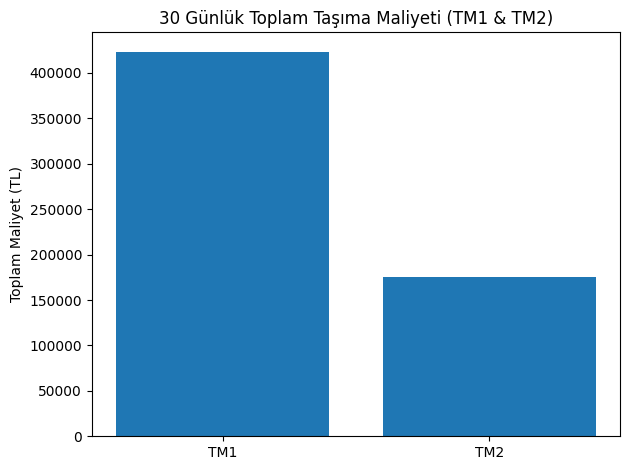

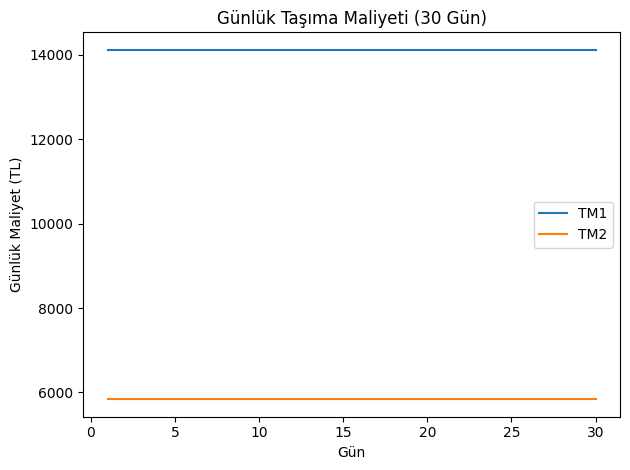

In [233]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# PARAMETRELER
# -------------------------------
GUN_SAYISI = 30

# -------------------------------
# 1️⃣ TM → Firmalar (günlük km & maliyet)
# -------------------------------
tm1_toplam_km = sum(r["toplam_km"] for r in rotalar_tm1)
tm2_toplam_km = sum(r["toplam_km"] for r in rotalar_tm2)

tm1_firma_maliyet = tm1_toplam_km * KM_MALIYET_FIRMA
tm2_firma_maliyet = tm2_toplam_km * KM_MALIYET_FIRMA

# -------------------------------
# 2️⃣ TM → Ayrıştırma (günlük maliyet)
# -------------------------------
tm1_sep_maliyet = (
    tmsep_ozet.loc[tmsep_ozet["TM"]=="TM1", "TMSEP_ToplamKM"].values[0] * KM_MALIYET +
    tmsep_ozet.loc[tmsep_ozet["TM"]=="TM1", "TMSEP_Sefer"].values[0] * SEFER_SABIT
)

tm2_sep_maliyet = (
    tmsep_ozet.loc[tmsep_ozet["TM"]=="TM2", "TMSEP_ToplamKM"].values[0] * KM_MALIYET +
    tmsep_ozet.loc[tmsep_ozet["TM"]=="TM2", "TMSEP_Sefer"].values[0] * SEFER_SABIT
)

# -------------------------------
# 3️⃣ Günlük & 30 günlük toplam maliyet
# -------------------------------
tm1_gunluk_maliyet = tm1_firma_maliyet + tm1_sep_maliyet
tm2_gunluk_maliyet = tm2_firma_maliyet + tm2_sep_maliyet

tm1_30gun_maliyet = tm1_gunluk_maliyet * GUN_SAYISI
tm2_30gun_maliyet = tm2_gunluk_maliyet * GUN_SAYISI

# -------------------------------
# 4️⃣ BAR GRAFİK – 30 Günlük Toplam
# -------------------------------
plt.figure()
plt.bar(["TM1", "TM2"], [tm1_30gun_maliyet, tm2_30gun_maliyet])
plt.title("30 Günlük Toplam Taşıma Maliyeti (TM1 & TM2)")
plt.ylabel("Toplam Maliyet (TL)")
plt.tight_layout()
plt.show()

# -------------------------------
# 5️⃣ ÇİZGİ GRAFİK – Günlük Maliyet (30 Gün)
# -------------------------------
gunler = np.arange(1, GUN_SAYISI + 1)

plt.figure()
plt.plot(gunler, [tm1_gunluk_maliyet]*GUN_SAYISI, label="TM1")
plt.plot(gunler, [tm2_gunluk_maliyet]*GUN_SAYISI, label="TM2")
plt.title("Günlük Taşıma Maliyeti (30 Gün)")
plt.xlabel("Gün")
plt.ylabel("Günlük Maliyet (TL)")
plt.legend()
plt.tight_layout()
plt.show()


In [235]:
import numpy as np

# TM1 sefer bazlı değerler
tm1_sefer_no = np.arange(1, len(rotalar_tm1) + 1)
tm1_sefer_maliyet = [r["toplam_km"] * KM_MALIYET_FIRMA for r in rotalar_tm1]

# TM2 sefer bazlı değerler
tm2_sefer_no = np.arange(1, len(rotalar_tm2) + 1)
tm2_sefer_maliyet = [r["toplam_km"] * KM_MALIYET_FIRMA for r in rotalar_tm2]


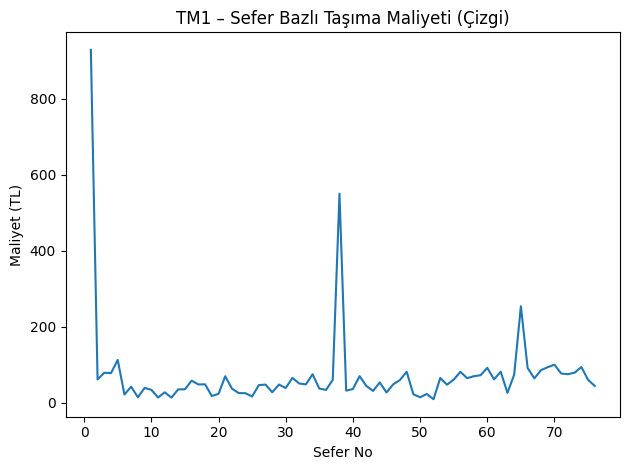

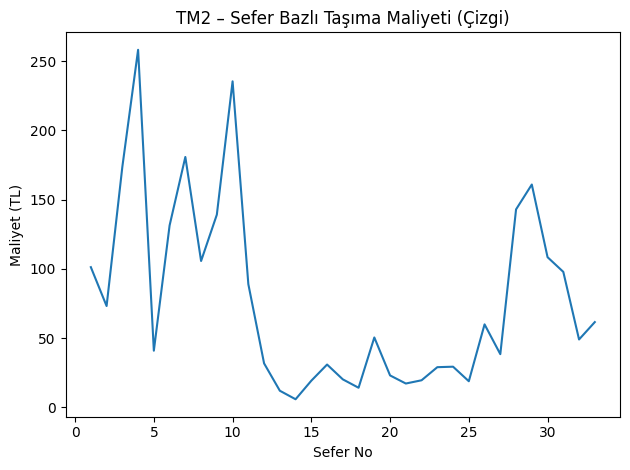

In [236]:
# TM1
plt.figure()
plt.plot(tm1_sefer_no, tm1_sefer_maliyet)
plt.title("TM1 – Sefer Bazlı Taşıma Maliyeti (Çizgi)")
plt.xlabel("Sefer No")
plt.ylabel("Maliyet (TL)")
plt.tight_layout()
plt.show()

# TM2
plt.figure()
plt.plot(tm2_sefer_no, tm2_sefer_maliyet)
plt.title("TM2 – Sefer Bazlı Taşıma Maliyeti (Çizgi)")
plt.xlabel("Sefer No")
plt.ylabel("Maliyet (TL)")
plt.tight_layout()
plt.show()


In [238]:
# TM1 sefer bazlı maliyetler
tm1_sefer_maliyet = [r["toplam_km"] * KM_MALIYET_FIRMA for r in rotalar_tm1]

# TM2 sefer bazlı maliyetler
tm2_sefer_maliyet = [r["toplam_km"] * KM_MALIYET_FIRMA for r in rotalar_tm2]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13080\3372230916.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


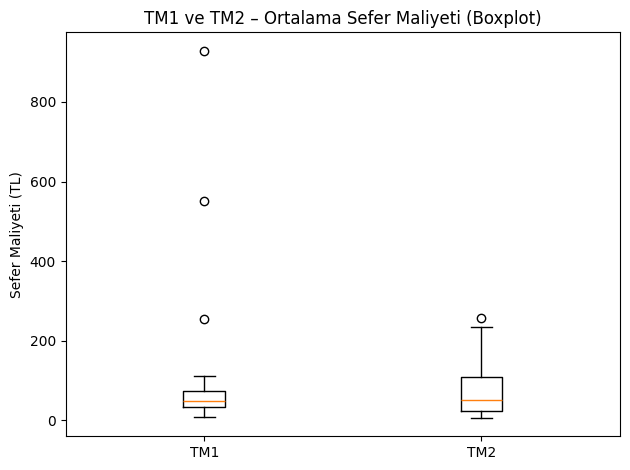

In [240]:
import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(
    [tm1_sefer_maliyet, tm2_sefer_maliyet],
    labels=["TM1", "TM2"]
)

plt.title("TM1 ve TM2 – Ortalama Sefer Maliyeti (Boxplot)")
plt.ylabel("Sefer Maliyeti (TL)")
plt.tight_layout()
plt.show()



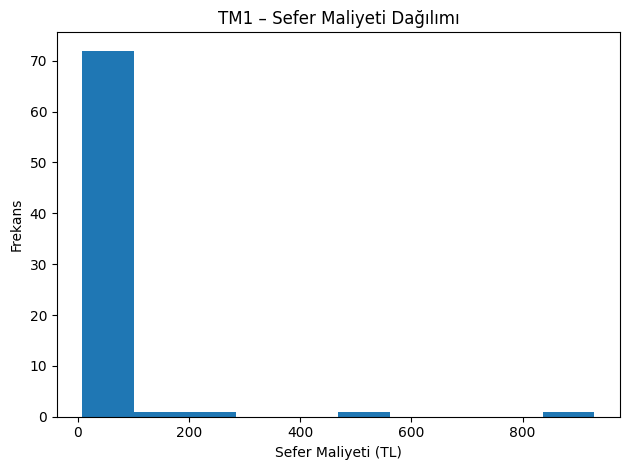

In [241]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(tm1_sefer_maliyet, bins=10)
plt.title("TM1 – Sefer Maliyeti Dağılımı")
plt.xlabel("Sefer Maliyeti (TL)")
plt.ylabel("Frekans")
plt.tight_layout()
plt.show()


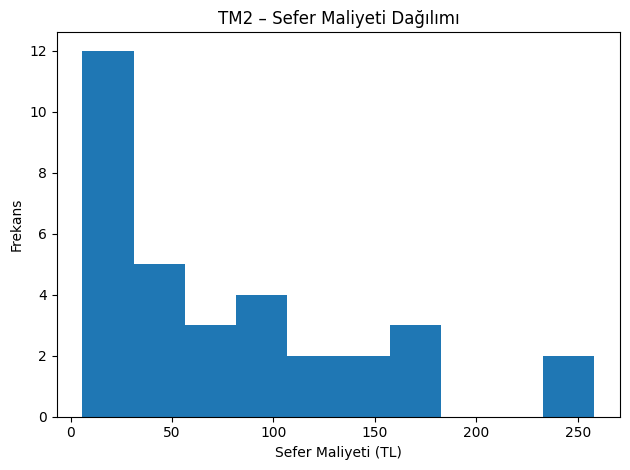

In [242]:
plt.figure()
plt.hist(tm2_sefer_maliyet, bins=10)
plt.title("TM2 – Sefer Maliyeti Dağılımı")
plt.xlabel("Sefer Maliyeti (TL)")
plt.ylabel("Frekans")
plt.tight_layout()
plt.show()


In [243]:
# TM1 -> SEP sefer bazlı maliyetler
tm1_sep_sefer_maliyet = [
    s["Mesafe_km"] * KM_MALIYET + SEFER_SABIT
    for s in tm1_sep_seferler
]

# TM2 -> SEP sefer bazlı maliyetler
tm2_sep_sefer_maliyet = [
    s["Mesafe_km"] * KM_MALIYET + SEFER_SABIT
    for s in tm2_sep_seferler
]


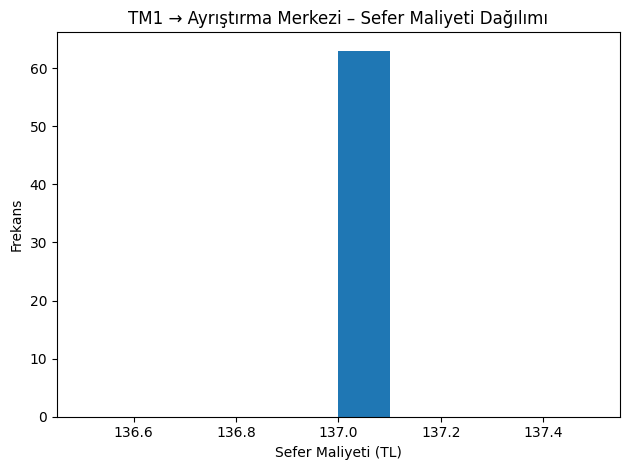

In [245]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(tm1_sep_sefer_maliyet, bins=10)
plt.title("TM1 → Ayrıştırma Merkezi – Sefer Maliyeti Dağılımı")
plt.xlabel("Sefer Maliyeti (TL)")
plt.ylabel("Frekans")
plt.tight_layout()
plt.show()


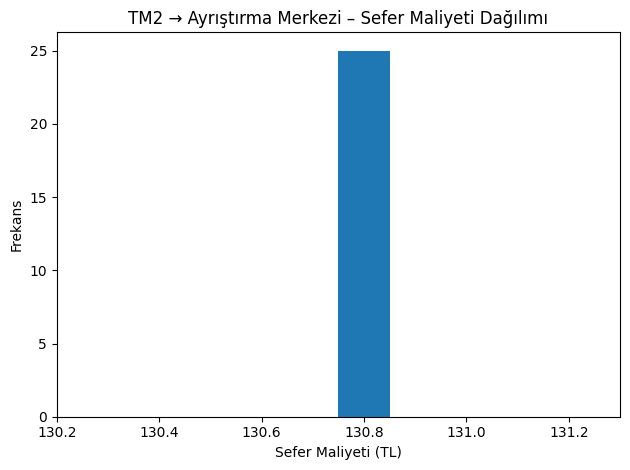

In [248]:
plt.figure()
plt.hist(tm2_sep_sefer_maliyet, bins=10)
plt.title("TM2 → Ayrıştırma Merkezi – Sefer Maliyeti Dağılımı")
plt.xlabel("Sefer Maliyeti (TL)")
plt.ylabel("Frekans")
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13080\1370005419.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


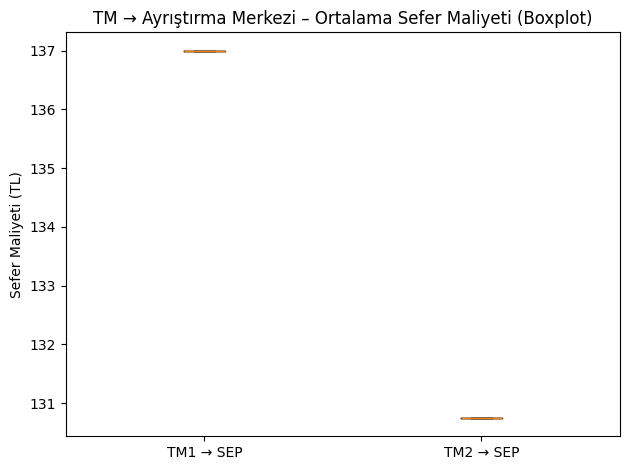

In [247]:
plt.figure()
plt.boxplot(
    [tm1_sep_sefer_maliyet, tm2_sep_sefer_maliyet],
    labels=["TM1 → SEP", "TM2 → SEP"]
)
plt.title("TM → Ayrıştırma Merkezi – Ortalama Sefer Maliyeti (Boxplot)")
plt.ylabel("Sefer Maliyeti (TL)")
plt.tight_layout()
plt.show()


In [253]:
# TM1 -> Firmalar günlük maliyet
tm1_firma_gunluk_maliyet = sum(
    r["toplam_km"] * KM_MALIYET_FIRMA for r in rotalar_tm1
)

# TM2 -> Firmalar günlük maliyet
tm2_firma_gunluk_maliyet = sum(
    r["toplam_km"] * KM_MALIYET_FIRMA for r in rotalar_tm2
)


In [254]:
GUN_SAYISI = 30

tm1_firma_aylik_maliyet = tm1_firma_gunluk_maliyet * GUN_SAYISI
tm2_firma_aylik_maliyet = tm2_firma_gunluk_maliyet * GUN_SAYISI


In [255]:
print("\n--- TM → FİRMALAR (30 GÜNLÜK) TAŞIMA MALİYETİ ---")
print(f"TM1 → Firmalar Aylık Maliyet: {tm1_firma_aylik_maliyet:,.2f} TL")
print(f"TM2 → Firmalar Aylık Maliyet: {tm2_firma_aylik_maliyet:,.2f} TL")
print(f"TOPLAM TM → Firmalar Aylık Maliyet: {(tm1_firma_aylik_maliyet + tm2_firma_aylik_maliyet):,.2f} TL")



--- TM → FİRMALAR (30 GÜNLÜK) TAŞIMA MALİYETİ ---
TM1 → Firmalar Aylık Maliyet: 164,598.00 TL
TM2 → Firmalar Aylık Maliyet: 77,103.00 TL
TOPLAM TM → Firmalar Aylık Maliyet: 241,701.00 TL


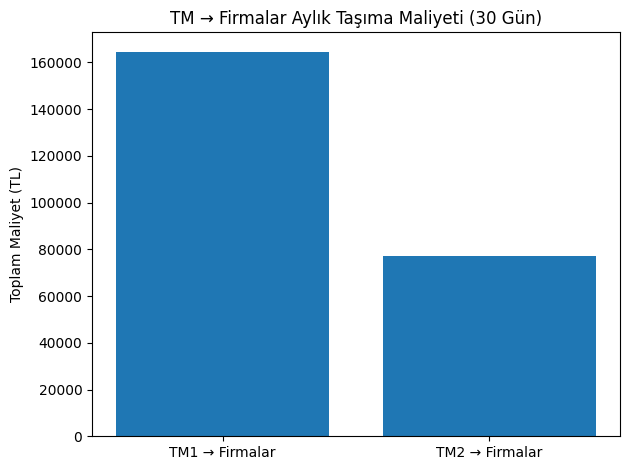

In [256]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(
    ["TM1 → Firmalar", "TM2 → Firmalar"],
    [tm1_firma_aylik_maliyet, tm2_firma_aylik_maliyet]
)
plt.title("TM → Firmalar Aylık Taşıma Maliyeti (30 Gün)")
plt.ylabel("Toplam Maliyet (TL)")
plt.tight_layout()
plt.show()


In [249]:
# TM1 -> SEP günlük maliyet
tm1_sep_gunluk_maliyet = (
    tmsep_ozet.loc[tmsep_ozet["TM"] == "TM1", "TMSEP_ToplamKM"].values[0] * KM_MALIYET +
    tmsep_ozet.loc[tmsep_ozet["TM"] == "TM1", "TMSEP_Sefer"].values[0] * SEFER_SABIT
)

# TM2 -> SEP günlük maliyet
tm2_sep_gunluk_maliyet = (
    tmsep_ozet.loc[tmsep_ozet["TM"] == "TM2", "TMSEP_ToplamKM"].values[0] * KM_MALIYET +
    tmsep_ozet.loc[tmsep_ozet["TM"] == "TM2", "TMSEP_Sefer"].values[0] * SEFER_SABIT
)


In [250]:
GUN_SAYISI = 30

tm1_sep_aylik_maliyet = tm1_sep_gunluk_maliyet * GUN_SAYISI
tm2_sep_aylik_maliyet = tm2_sep_gunluk_maliyet * GUN_SAYISI


In [251]:
print("\n--- TM → AYRIŞTIRMA MERKEZİ (30 GÜNLÜK) MALİYET ---")
print(f"TM1 → SEP Aylık Maliyet: {tm1_sep_aylik_maliyet:,.2f} TL")
print(f"TM2 → SEP Aylık Maliyet: {tm2_sep_aylik_maliyet:,.2f} TL")
print(f"TOPLAM TM → SEP Aylık Maliyet: {(tm1_sep_aylik_maliyet + tm2_sep_aylik_maliyet):,.2f} TL")



--- TM → AYRIŞTIRMA MERKEZİ (30 GÜNLÜK) MALİYET ---
TM1 → SEP Aylık Maliyet: 258,930.00 TL
TM2 → SEP Aylık Maliyet: 98,062.50 TL
TOPLAM TM → SEP Aylık Maliyet: 356,992.50 TL


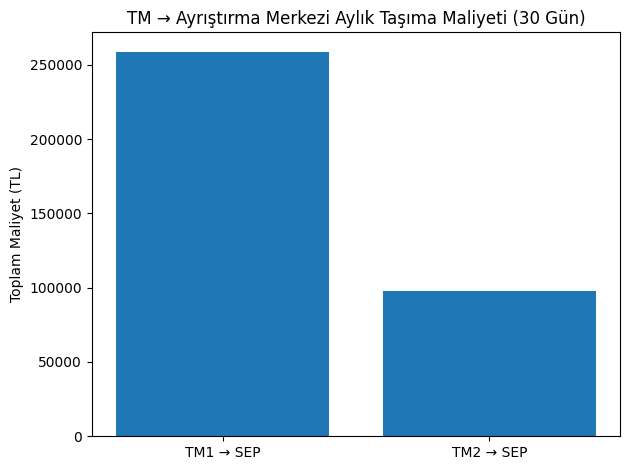

In [252]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(
    ["TM1 → SEP", "TM2 → SEP"],
    [tm1_sep_aylik_maliyet, tm2_sep_aylik_maliyet]
)
plt.title("TM → Ayrıştırma Merkezi Aylık Taşıma Maliyeti (30 Gün)")
plt.ylabel("Toplam Maliyet (TL)")
plt.tight_layout()
plt.show()
